# Import Libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Matplolib default parameters
from matplotlib import rcParams
plt.style.use('default')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

# import warning
import warnings
warnings.filterwarnings('ignore')

# Set option max columns display
pd.set_option('max_columns', 150)
pd.set_option('max_colwidth', 150)
pd.set_option('max_rows', 100)

# Data

data = https://www.kaggle.com/datasets/ruthgn/bank-marketing-data-set?select=bank-direct-marketing-campaigns.csv

## bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
## Related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
## Other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
## Social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric) - Euro Interbank Offered Rate. The Euribor rates are based on the average interest rates at which a large panel of European banks borrow funds from one another
20. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target): <br>
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

In [17]:
data = pd.read_csv('bank-direct-marketing-campaigns.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
print('Dataset shape :', data.shape)

Dataset shape : (41188, 20)


In [5]:
# Create Data Info

list_item = []
for col in data.columns:
    list_item.append([col, data[col].dtype, data[col].isna().sum(), 100*data[col].isna().sum()/len(data[col]), data[col].nunique(), data[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,age,int64,0,0.0,78,"[56, 57, 37, 40]"
1,job,object,0,0.0,12,"[housemaid, services, admin., blue-collar]"
2,marital,object,0,0.0,4,"[married, single, divorced, unknown]"
3,education,object,0,0.0,8,"[basic.4y, high.school, basic.6y, basic.9y]"
4,default,object,0,0.0,3,"[no, unknown, yes]"
5,housing,object,0,0.0,3,"[no, yes, unknown]"
6,loan,object,0,0.0,3,"[no, yes, unknown]"
7,contact,object,0,0.0,2,"[telephone, cellular]"
8,month,object,0,0.0,10,"[may, jun, jul, aug]"
9,day_of_week,object,0,0.0,5,"[mon, tue, wed, thu]"


# Exploratory Data Analysis

In [18]:
# copy data 
eda = data.copy()

In [19]:
# devide category and numeric
cat = eda.select_dtypes(include='object').columns
num = eda.select_dtypes(exclude='object').columns

## Descriptive Statistic

In [48]:
eda[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [53]:
print('Total converted', eda['y'].value_counts()[1], 'out of', eda['y'].value_counts()[0])

Total converted 4640 out of 36548


In [55]:
print('Conversion Rate: ', round(eda['y'].value_counts()[1]/(eda['y'].value_counts()[0]+eda['y'].value_counts()[1])*100), '%')

Conversion Rate:  11 %


In [16]:
# Feature engineering
eda['converted'] = np.where(eda['y']=='yes',1,0)

## Getting the sum of the number of conversions per campaign

In [62]:
pd.DataFrame(eda.groupby('campaign')['converted'].sum())

,converted
campaign,
1,2300
2,1211
3,574
4,249
5,120
6,75
7,38
8,17
9,17


## Getting the total number of customers targeted per campaign

In [63]:
pd.DataFrame(eda.groupby(by='campaign')['converted'].count())

,converted
campaign,
1,17642
2,10570
3,5341
4,2651
5,1599
6,979
7,629
8,400
9,283


## Finding the conversion rate for each campaign

In [92]:
conv_by_camp = eda.groupby('campaign')['converted'].sum() / eda.groupby('campaign')['converted'].count() * 100.0
conv_by_camp = pd.DataFrame(conv_by_camp).reset_index()
conv_by_camp.head(10)

,campaign,converted
0,1,13.037071
1,2,11.456954
2,3,10.747051
3,4,9.392682
4,5,7.504690
5,6,7.660878
6,7,6.041335
7,8,4.250000
8,9,6.007067
9,10,5.333333


## Conversion Rates by Age

In [79]:
# count
count = eda.groupby('age')['converted'].count().reset_index()
count['counts'] = count['converted']

# conv by age
conv_by_age = eda.groupby('age')['converted'].sum() / eda.groupby('age')['converted'].count() * 100.0
conv_by_age = pd.DataFrame(conv_by_age).reset_index()

# concat
conv_by_age2 = pd.concat([conv_by_age, count['counts']], axis=1)
conv_by_age2.head(20)

,age,converted,counts
0,17,40.000000,5
1,18,42.857143,28
2,19,47.619048,42
3,20,35.384615,65
4,21,28.431373,102
5,22,26.277372,137
6,23,21.238938,226
7,24,18.574514,463
8,25,15.551839,598
9,26,17.478510,698


In [81]:
conv_by_age2.sort_values(by='converted', ascending=False).head(25)

,age,converted,counts
77,98,100.000000,2
72,89,100.000000,2
70,87,100.000000,1
74,92,75.000000,4
60,77,65.000000,20
65,82,64.705882,17
69,86,62.500000,8
63,80,58.064516,31
59,76,52.941176,34
48,65,52.272727,44


Text(0.5, 1.0, 'Conversion Rate by Ages')

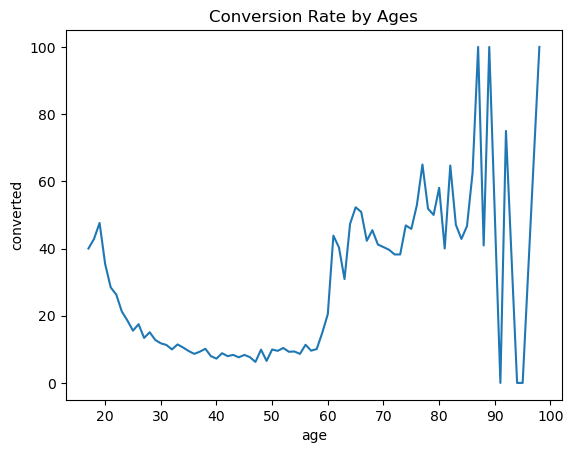

In [87]:
sns.lineplot(x=conv_by_age2['age'], y=conv_by_age2['converted'])
plt.title('Conversion Rate by Ages')

## Creating age groups for better interpretation of age

In [95]:
eda['age_group'] = eda['age'].apply(lambda x: '[17, 25)' if x < 25 else '[25, 35)' 
                                  if x < 35 else '[35, 45)'
                                  if x < 45 else '[45, 55)' 
                                  if x < 55 else '[55, 65)'
                                  if x < 65 else '65+')

In [96]:
# Grouping by age group now, let's sum the number of coversions
pd.DataFrame(eda.groupby('age_group')['converted'].sum())

,converted
age_group,
65+,313
"[17, 25)",256
"[25, 35)",1666
"[35, 45)",1168
"[45, 55)",753
"[55, 65)",484


In [97]:
# Grouping by age group now, let's count the number of coversions
pd.DataFrame(eda.groupby('age_group')['converted'].count())

,converted
age_group,
65+,663
"[17, 25)",1068
"[25, 35)",13686
"[35, 45)",13500
"[45, 55)",8704
"[55, 65)",3567


In [99]:
# Get perscent converted
conv_by_age_group = eda.groupby('age_group')['converted'].sum() / eda.groupby('age_group')['converted'].count() * 100.0
conv_by_age_group = pd.DataFrame(conv_by_age_group).reset_index()
conv_by_age_group.head()

,age_group,converted
0,65+,47.209653
1,"[17, 25)",23.970037
2,"[25, 35)",12.173024
3,"[35, 45)",8.651852
4,"[45, 55)",8.651195


Text(0.5, 1.0, 'Conversion Rate')

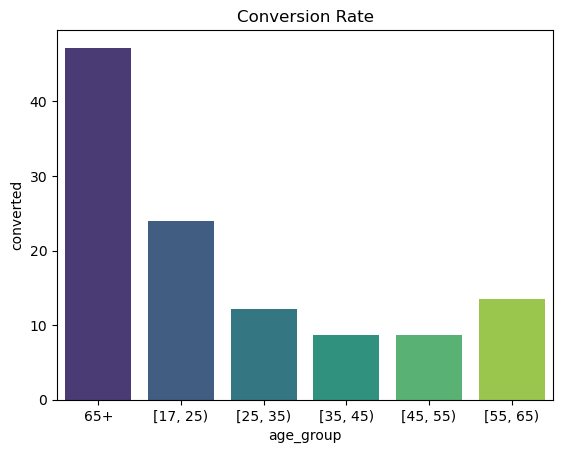

In [105]:
sns.barplot(x=conv_by_age_group['age_group'], y=conv_by_age_group['converted'], palette='viridis')
plt.title('Conversion Rate')

## Conversion Rate by Education

In [110]:
conv_by_edu = eda.groupby('education')['converted'].sum() / eda.groupby('education')['converted'].count() * 100.0
conv_by_edu = pd.DataFrame(conv_by_edu).reset_index()
conv_by_edu

,education,converted
0,basic.4y,10.249042
1,basic.6y,8.202443
2,basic.9y,7.824648
3,high.school,10.835523
4,illiterate,22.222222
5,professional.course,11.348465
6,university.degree,13.724523
7,unknown,14.500289


Text(0.5, 1.0, 'Conversion Rate')

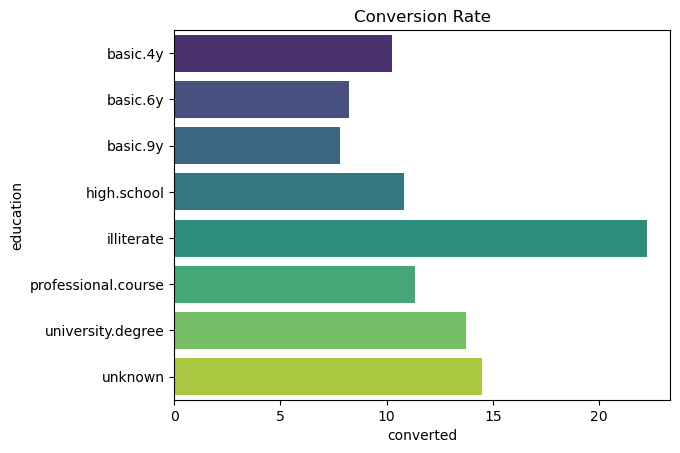

In [113]:
sns.barplot(y=conv_by_edu['education'], x=conv_by_edu['converted'], palette='viridis')
plt.title('Conversion Rate')

## Conversion Rate by Job

In [117]:
conv_rate_by_job = eda.groupby('job')['converted'].sum() / eda.groupby('job')['converted'].count() * 100.0
conv_rate_by_job = pd.DataFrame(conv_rate_by_job).reset_index().sort_values(by='converted', ascending=False)
conv_rate_by_job

,job,converted
8,student,31.428571
5,retired,25.232558
10,unemployed,14.201183
0,admin.,12.972558
4,management,11.217510
11,unknown,11.212121
9,technician,10.826042
6,self-employed,10.485574
3,housemaid,10.000000
2,entrepreneur,8.516484


Text(0.5, 1.0, 'Conversion Rate')

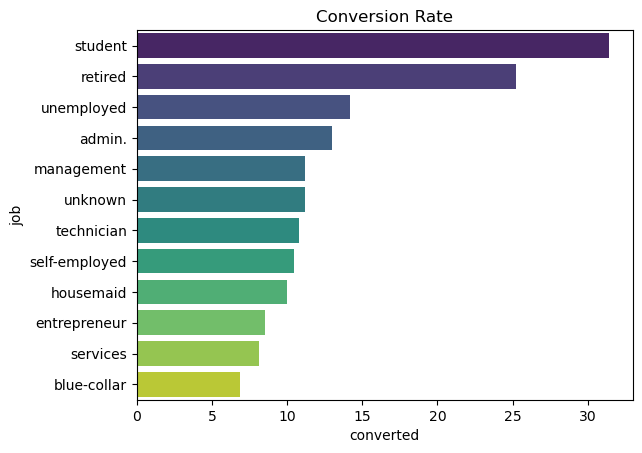

In [118]:
sns.barplot(y=conv_rate_by_job['job'], x=conv_rate_by_job['converted'], palette='viridis')
plt.title('Conversion Rate')

## Conversion Rate by Marital Status

In [120]:
conv_rate_by_mar = eda.groupby('marital')['converted'].sum() / eda.groupby('marital')['converted'].count() * 100.0
conv_rate_by_mar = pd.DataFrame(conv_rate_by_mar).reset_index().sort_values(by='converted', ascending=False)
conv_rate_by_mar

,marital,converted
3,unknown,15.000000
2,single,14.004149
0,divorced,10.320902
1,married,10.157253


Text(0.5, 1.0, 'Conversion Rate')

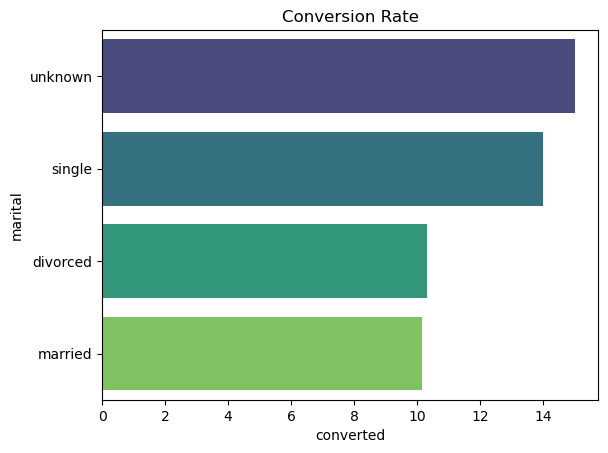

In [121]:
sns.barplot(y=conv_rate_by_mar['marital'], x=conv_rate_by_mar['converted'], palette='viridis')
plt.title('Conversion Rate')

## Conversion Rate by Month

In [17]:
conv_rate_by_month = eda.groupby('month')['converted'].sum() / eda.groupby('month')['converted'].count() * 100.0
conv_rate_by_month = pd.DataFrame(conv_rate_by_month).reset_index().sort_values(by='converted', ascending=False)
conv_rate_by_month

,month,converted
5,mar,50.549451
2,dec,48.901099
9,sep,44.912281
8,oct,43.871866
0,apr,20.478723
1,aug,10.602137
4,jun,10.511470
7,nov,10.143867
3,jul,9.046557
6,may,6.434745


<AxesSubplot:xlabel='month', ylabel='converted'>

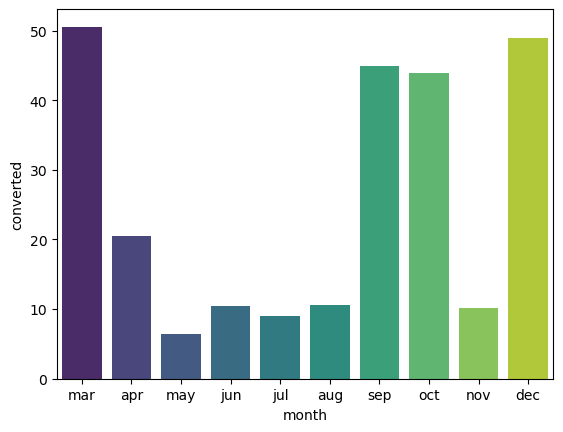

In [19]:
sns.barplot(x=conv_rate_by_month['month'],
            y=conv_rate_by_month['converted'],
            palette='viridis',
            order=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

## Univariate Analysis

### Boxplot

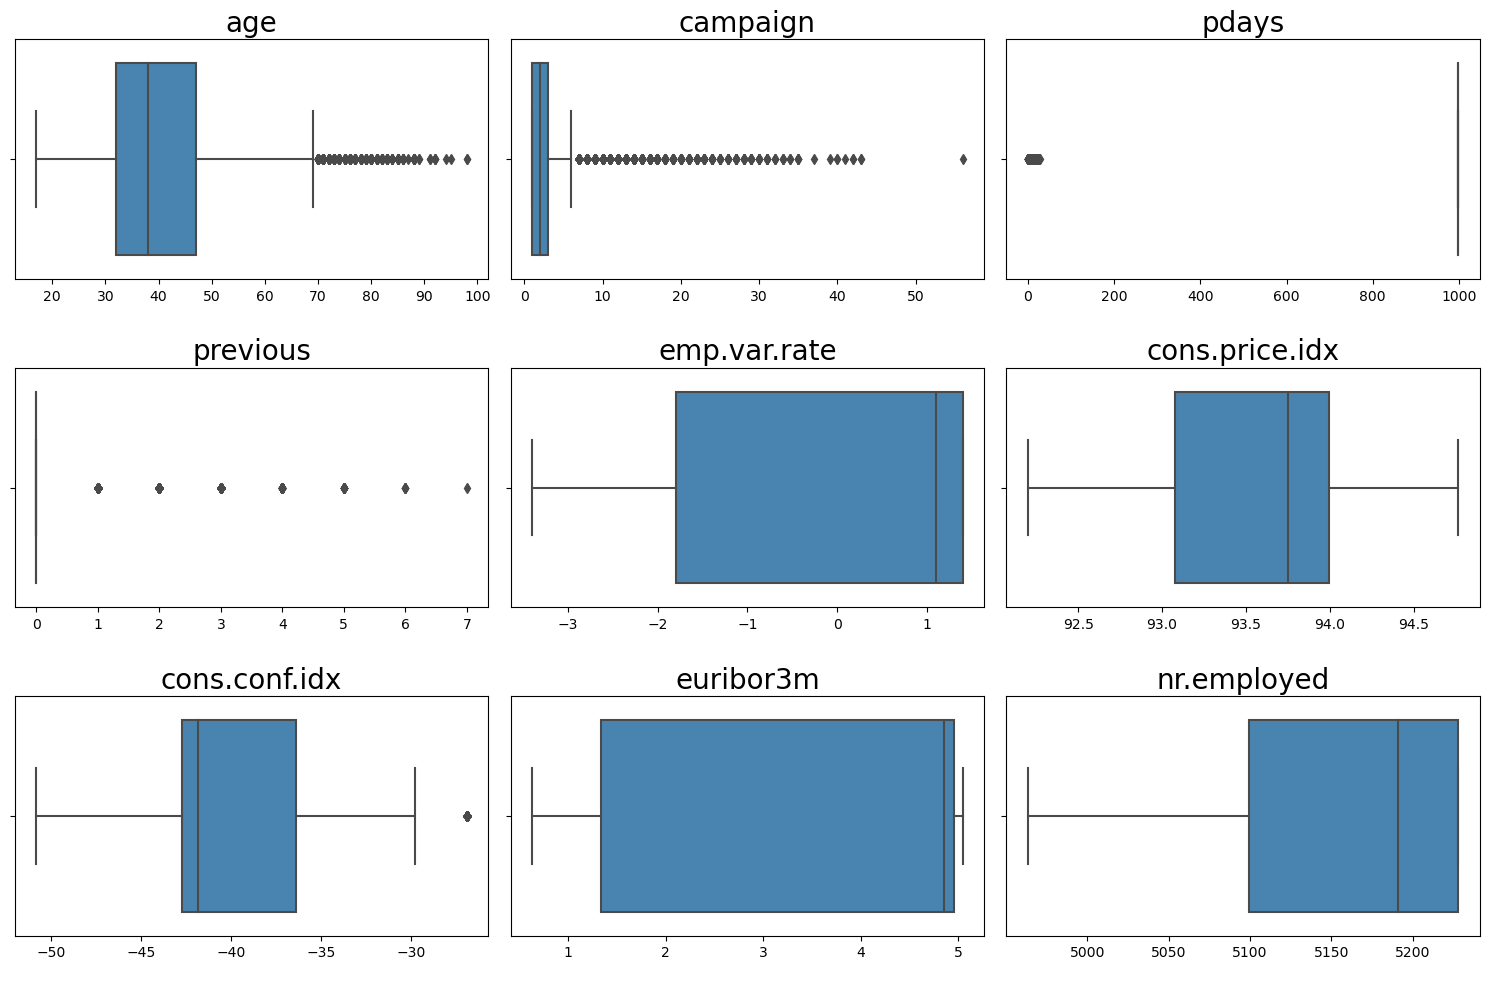

In [126]:
plt.figure(figsize=(15,10))
for i in range(0, len(num)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=eda[num[i]], palette='Blues_d')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

### Displot

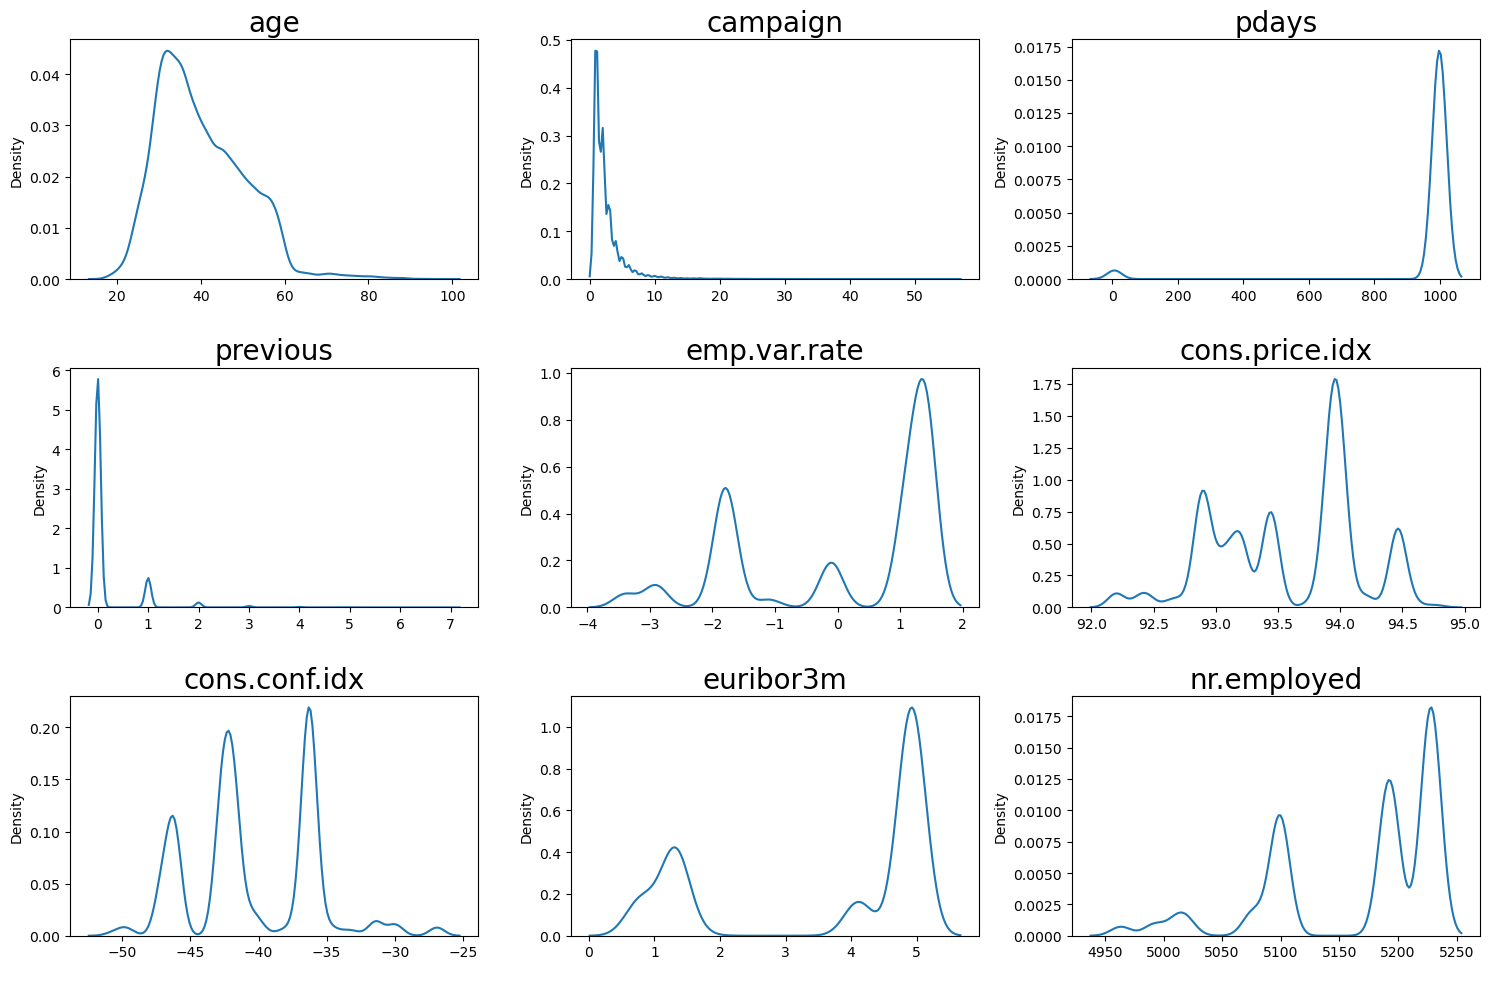

In [128]:
plt.figure(figsize=(15,10))
for i in range(0, len(num)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=eda[num[i]], palette='Blues_d')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

### Violinplot

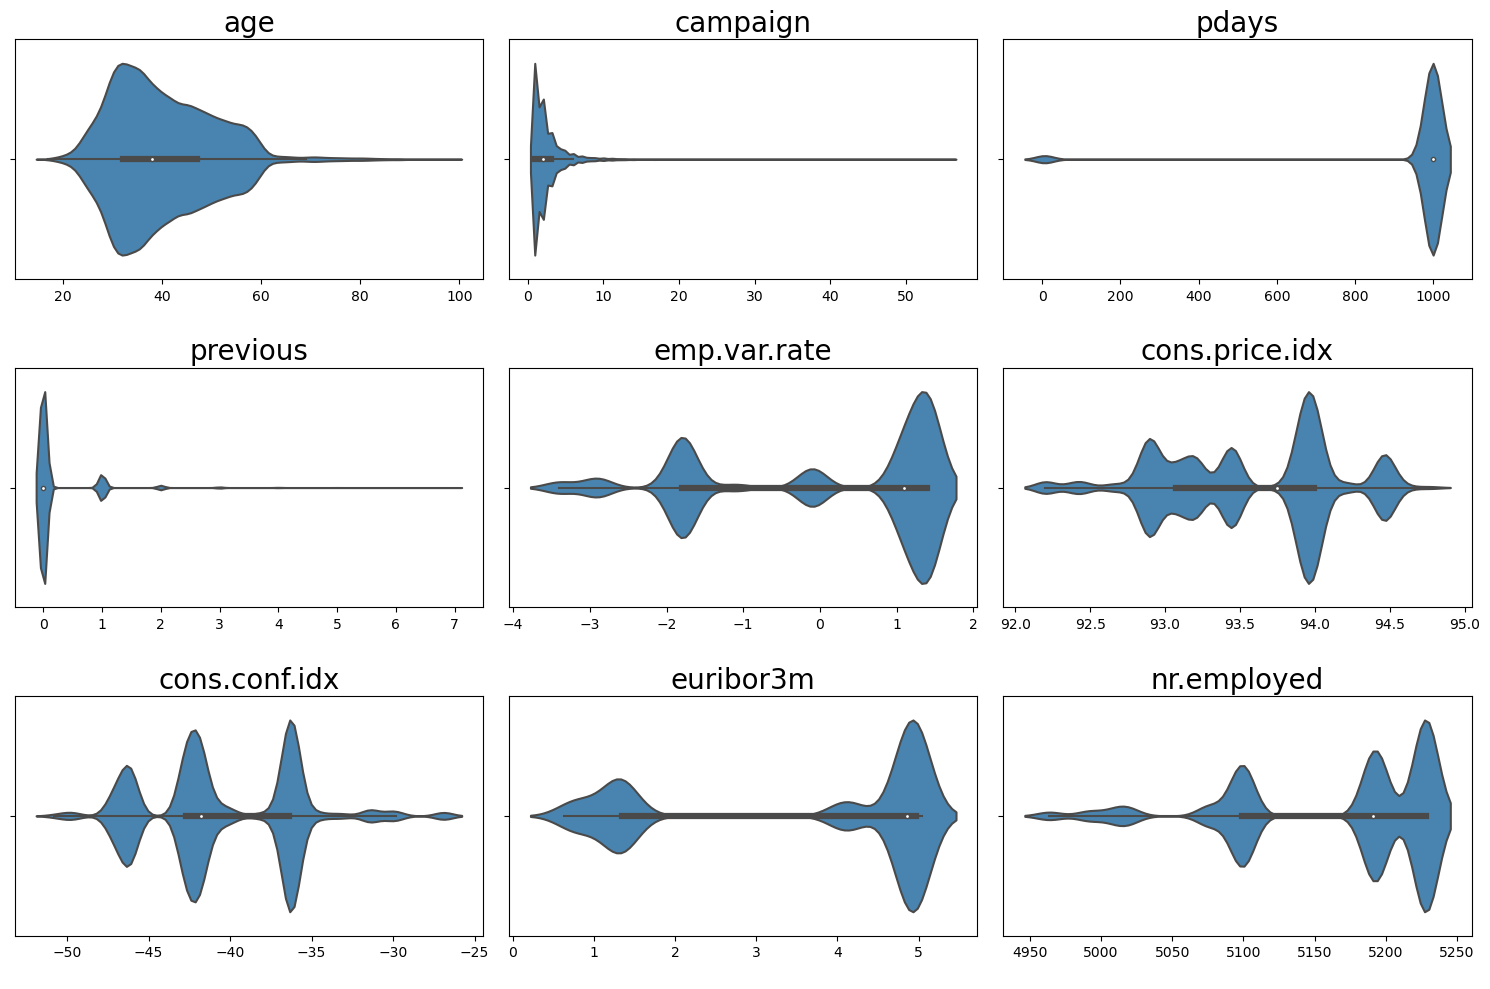

In [129]:
plt.figure(figsize=(15,10))
for i in range(0, len(num)):
    plt.subplot(3,3,i+1)
    sns.violinplot(x=eda[num[i]], palette='Blues_d')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

### Categorical Countplot

In [131]:
len(cat)

11

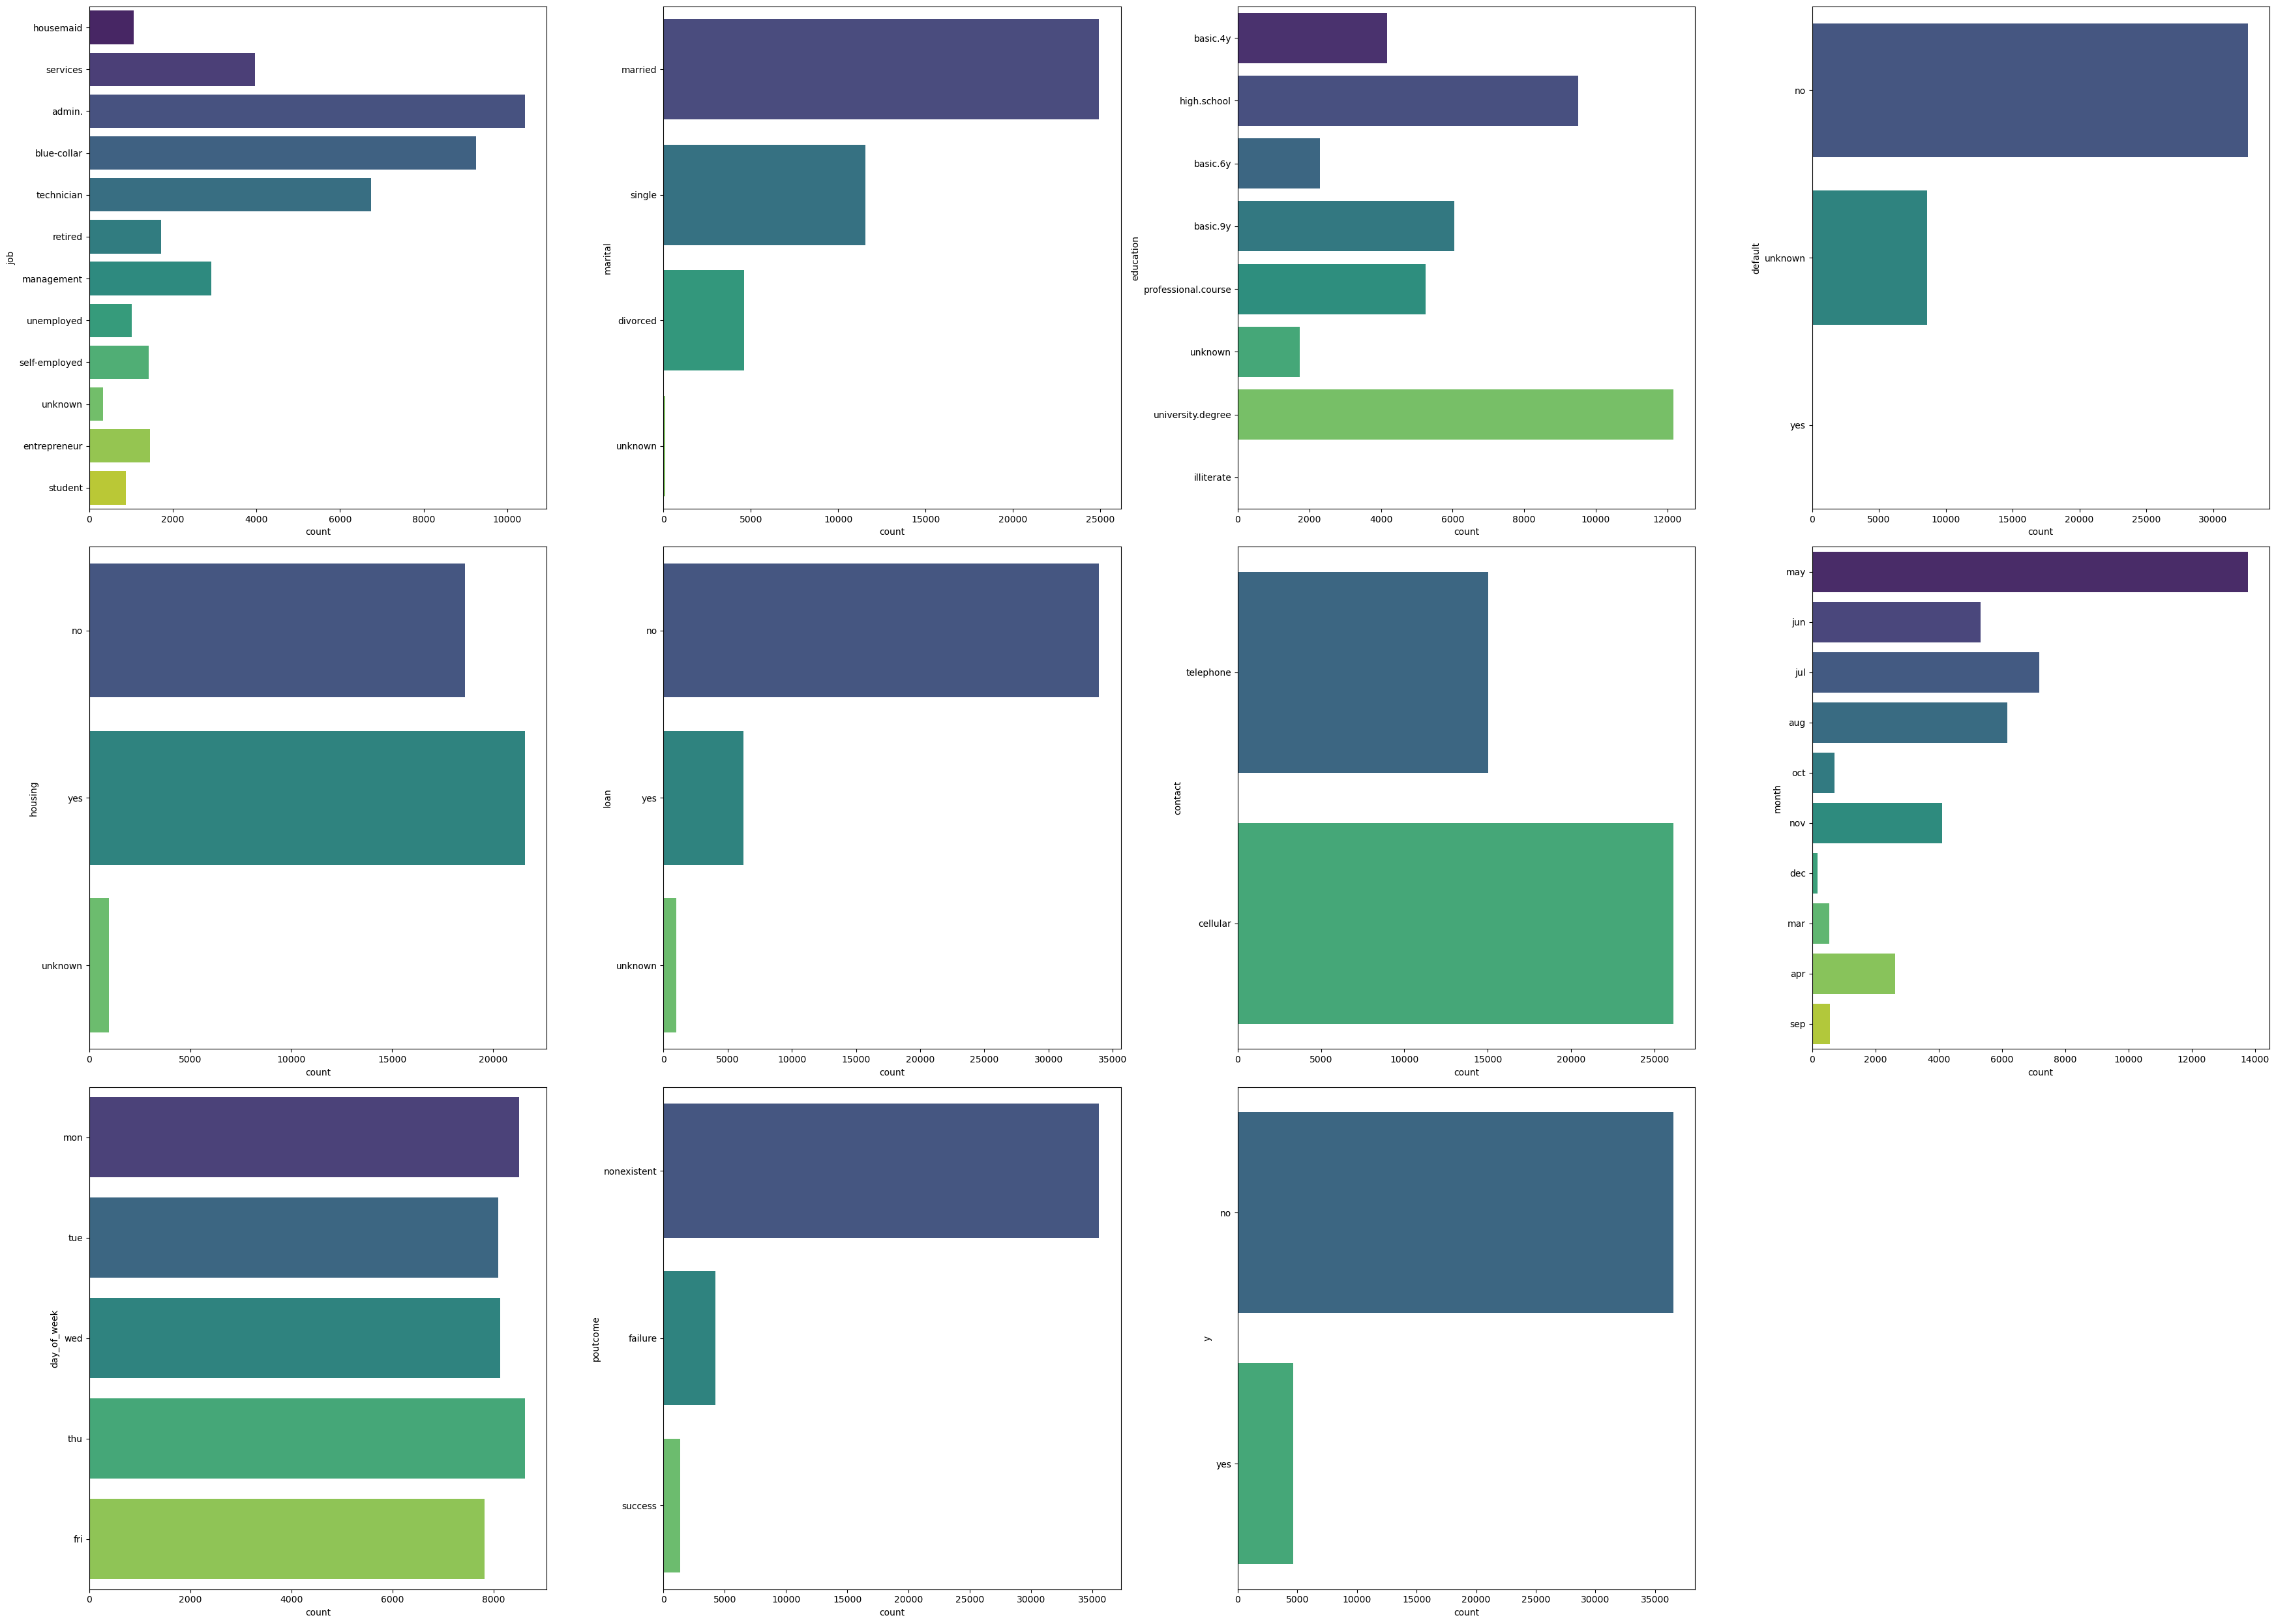

In [139]:
fig, axes = plt.subplots(3,4, figsize=(35,25))
xy = [(0,0), (0,1), (0,2), (0,3), (1,0), (1,1), (1,2), (1,3), (2,0), (2,1), (2,2), (2,3)]

for i in range(len(cat)):
    sns.countplot(y=eda[cat[i]], palette='viridis', ax=axes[xy[i]])
    axes[2,3].axis('off')
    plt.tight_layout() 

## Bivariate Analysis

### Numeric Feature Analysis

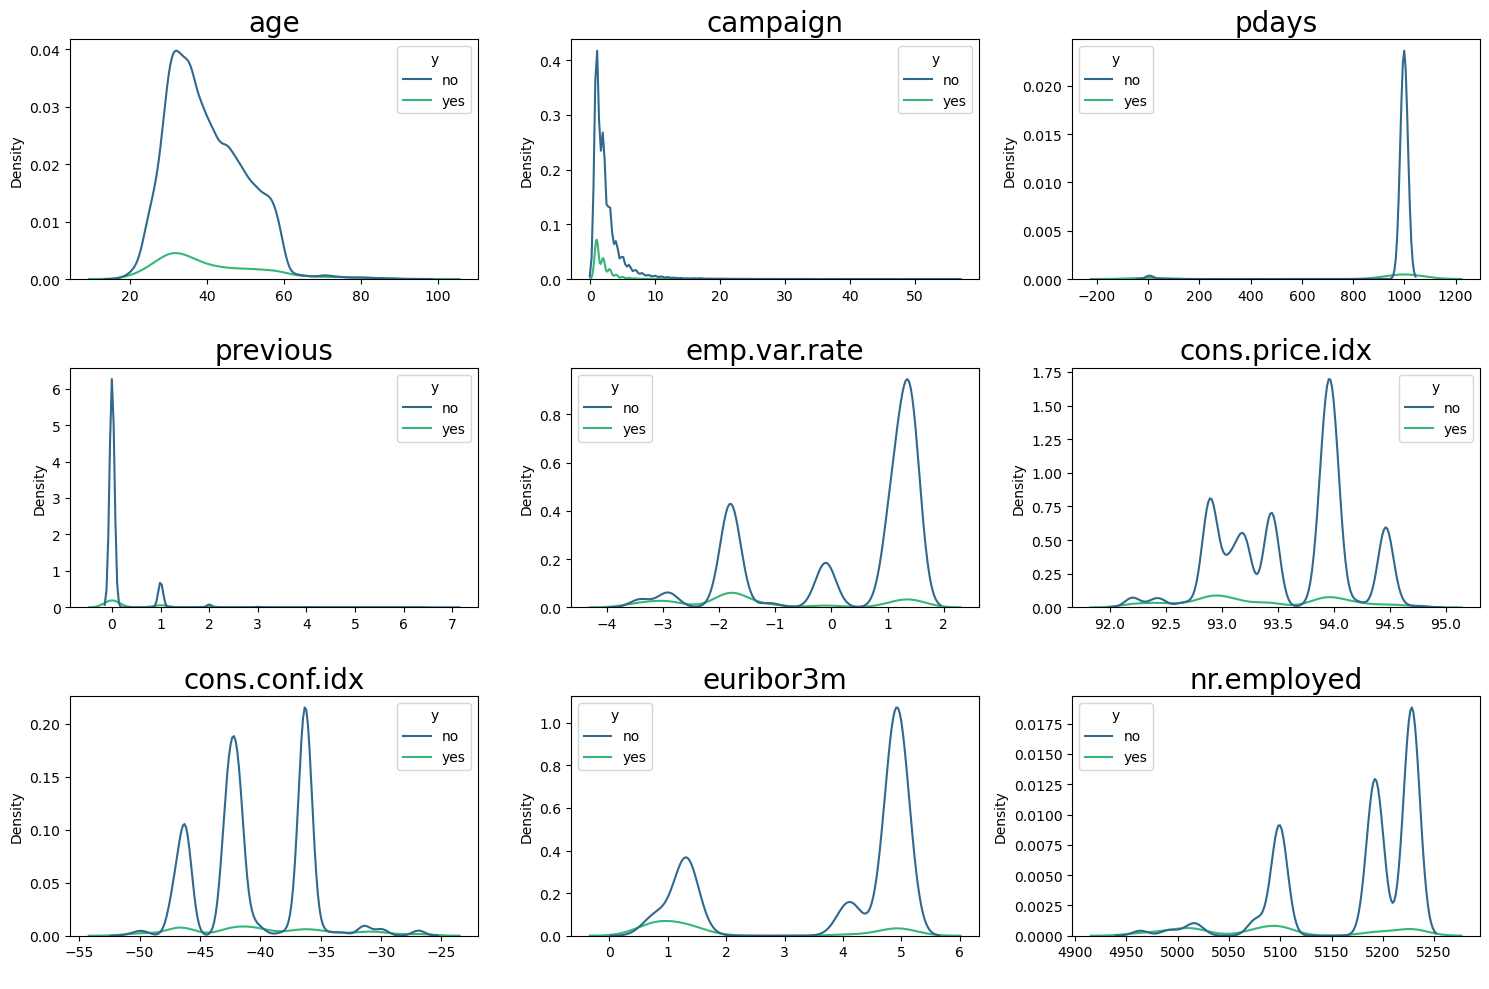

In [141]:
plt.figure(figsize=(15,10))
for i in range(0, len(num)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=eda[num[i]], palette='viridis', hue=eda['y'])
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

### Categorical Feature Analysis

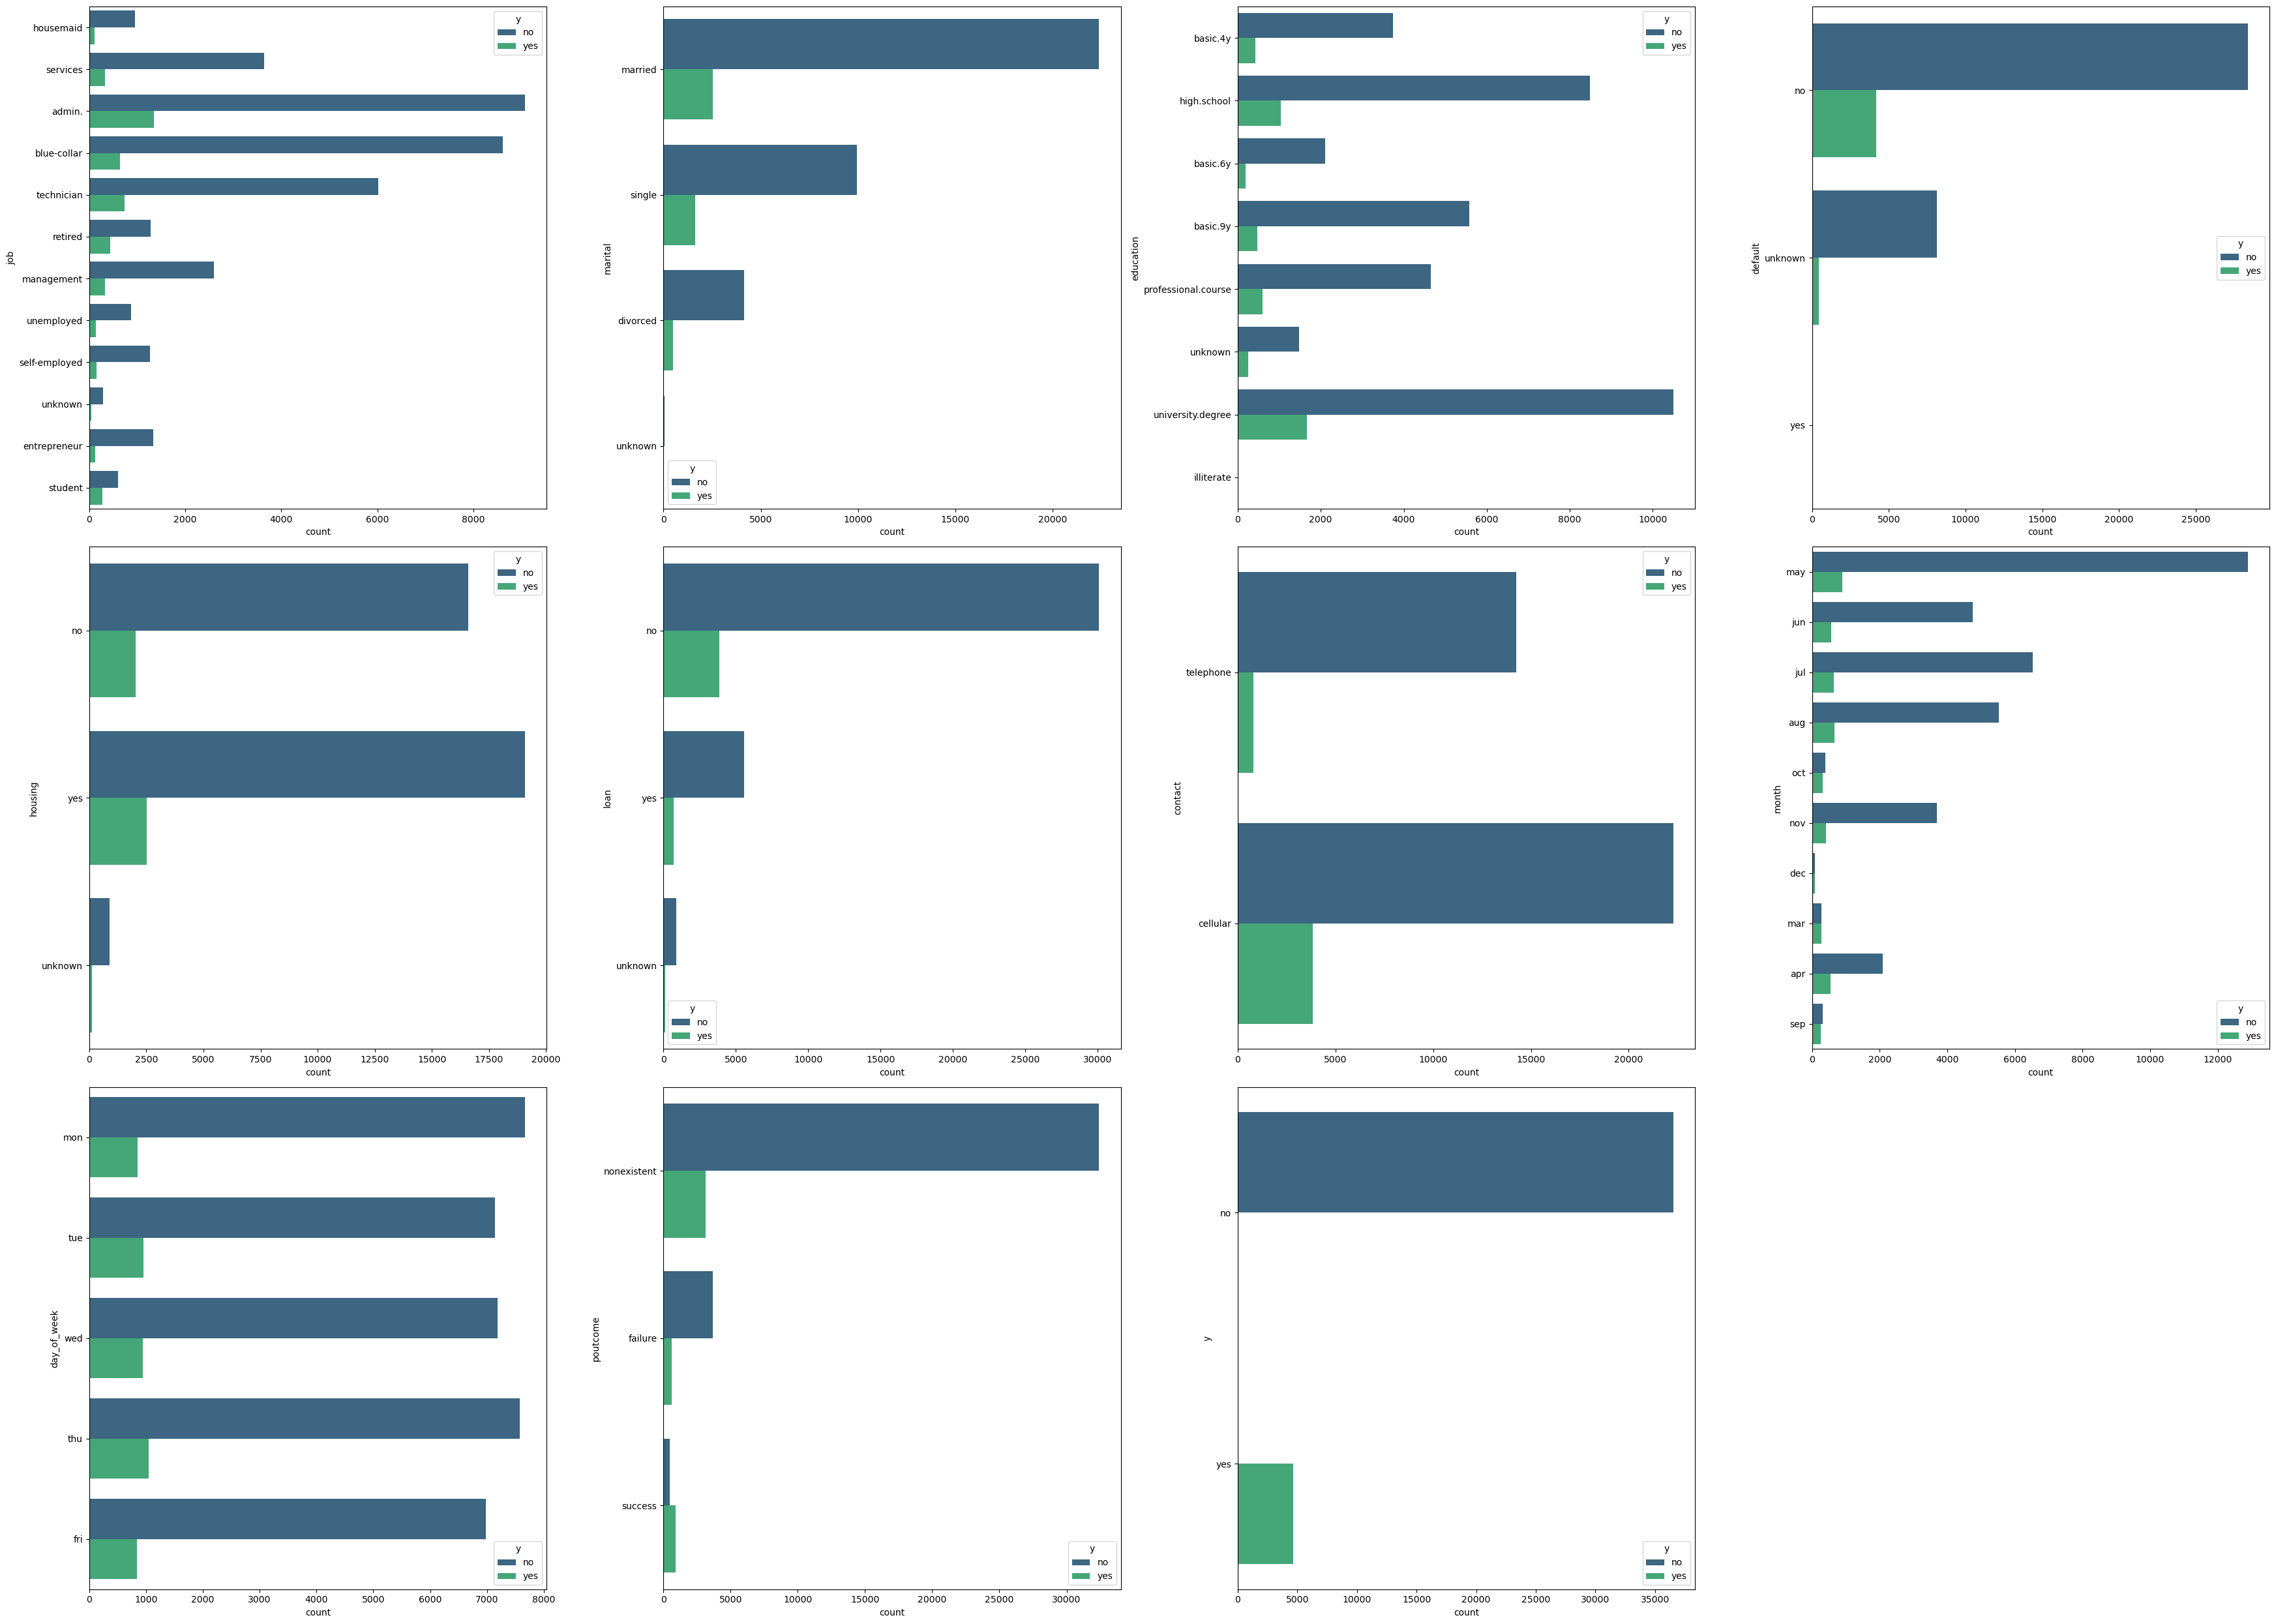

In [142]:
fig, axes = plt.subplots(3,4, figsize=(35,25))
xy = [(0,0), (0,1), (0,2), (0,3), (1,0), (1,1), (1,2), (1,3), (2,0), (2,1), (2,2), (2,3)]

for i in range(len(cat)):
    sns.countplot(y=eda[cat[i]], palette='viridis', ax=axes[xy[i]], hue=eda['y'])
    axes[2,3].axis('off')
    plt.tight_layout() 

### Correlation Heatmap

<AxesSubplot:>

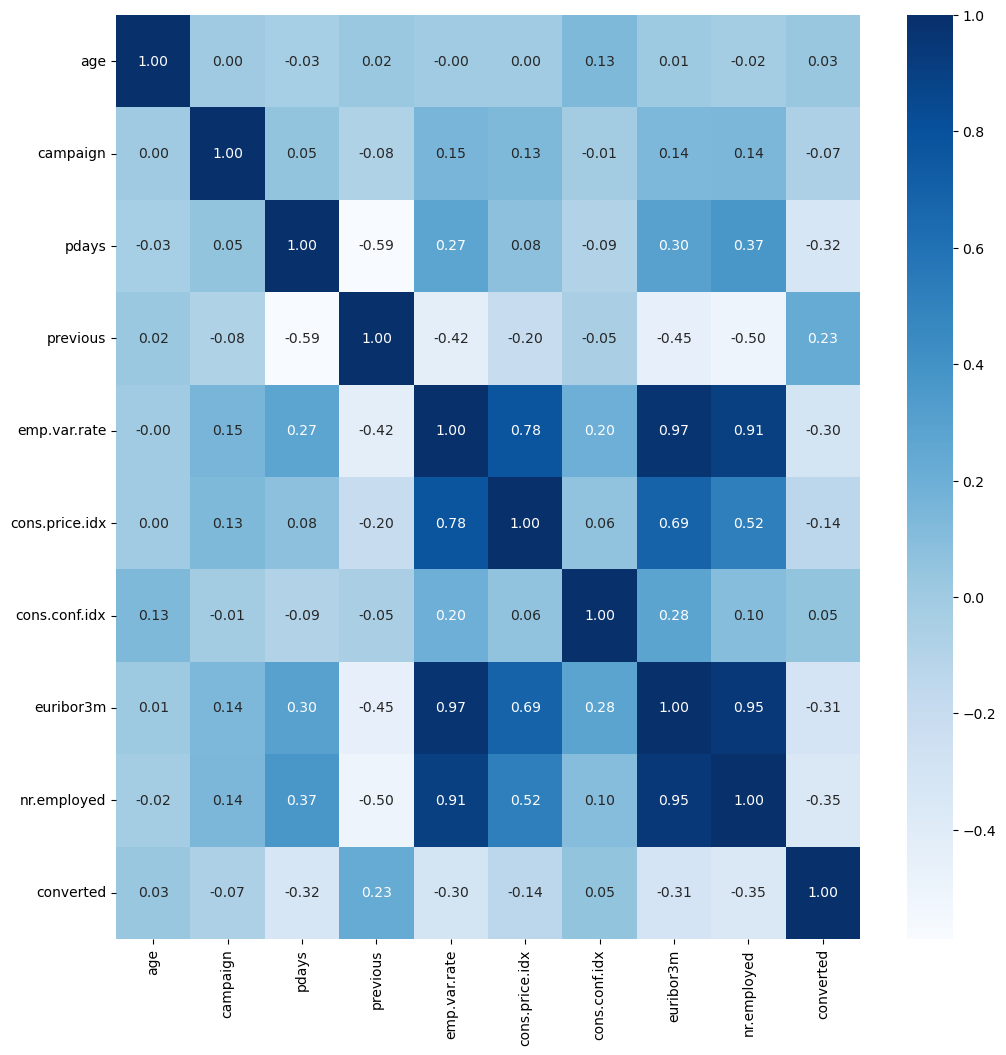

In [143]:
# Create Heatmap Correlation Chart for Each Numerical Features

plt.figure(figsize=(12, 12))
sns.heatmap(eda.corr(), cmap='Blues', annot=True, fmt='.2f')

# Data Preprocessing

its clean data, no need to do missing values imputation

## Drop Duplicate

In [9]:
print('Num of duplicated rows :', data.duplicated().sum())

Num of duplicated rows : 1784


In [20]:
# drop duplicate
data = data.drop_duplicates()

print('Num of duplicated rows :', data.duplicated().sum())

Num of duplicated rows : 0


## Feature Engineering

In [34]:
for i in cat:
    print(i)
    print(data[i].value_counts())
    print('\n')

job
admin.           9873
blue-collar      8835
technician       6404
services         3801
management       2820
retired          1683
entrepreneur     1405
self-employed    1386
housemaid        1028
unemployed        992
student           852
unknown           325
Name: job, dtype: int64


marital
married     23869
single      10997
divorced     4459
unknown        79
Name: marital, dtype: int64


education
university.degree      11561
high.school             9121
basic.9y                5785
professional.course     5018
basic.4y                3993
basic.6y                2222
unknown                 1686
illiterate                18
Name: education, dtype: int64


default
no         31135
unknown     8266
yes            3
Name: default, dtype: int64


housing
yes        20561
no         17863
unknown      980
Name: housing, dtype: int64


loan
no         32248
yes         6176
unknown      980
Name: loan, dtype: int64


contact
cellular     24673
telephone    14731
Name: contact, 

### Education

In [35]:
data['education'].value_counts()

university.degree      11561
high.school             9121
basic.9y                5785
professional.course     5018
basic.4y                3993
basic.6y                2222
unknown                 1686
illiterate                18
Name: education, dtype: int64

In [44]:
data.groupby(['education', 'job']).agg(job=('job','count'))

job
education           job                
basic.4y            admin.           74
                    blue-collar    2197
                    entrepreneur    132
                    housemaid       451
                    management       98
                    retired         579
                    self-employed    92
                    services        129
                    student          23
                    technician       56
                    unemployed      110
                    unknown          52
basic.6y            admin.          143
                    blue-collar    1382
                    entrepreneur     71
                    housemaid        72
                    management       83
                    retired          71
                    self-employed    24
                    services        222
                    student          12
                    technician       86
                    unemployed       34
                    unknown          22
basic.9y            admin.          492
                    blue-collar    3420
                    entrepreneur    205
                    housemaid        94
                    management      164
                    retired         144
                    self-employed   213
                    services        376
                    student          96
                    technician      366
                    unemployed      184
                    unknown          31
high.school         admin.         3169
                    blue-collar     859
                    entrepreneur    222
                    housemaid       172
                    management      290
                    retired         272
                    self-employed   117
                    services       2552
                    student         348
                    technician      831
                    unemployed      253
                    unknown          36
illiterate          admin.            1
                    blue-collar       8
                    entrepreneur      2
                    housemaid         1
                    retired           3
                    self-employed     3
professional.course admin.          347
                    blue-collar     443
                    entrepreneur    127
                    housemaid        59
                    management       89
                    retired         239
                    self-employed   166
                    services        208
                    student          43
                    technician     3146
                    unemployed      139
                    unknown          12
university.degree   admin.         5404
                    blue-collar      92
                    entrepreneur    589
                    housemaid       137
                    management     1974
                    retired         280
                    self-employed   742
                    services        169
                    student         164
                    technician     1713
                    unemployed      253
                    unknown          44
unknown             admin.          243
                    blue-collar     434
                    entrepreneur     57
                    housemaid        42
                    management      122
                    retired          95
                    self-employed    29
                    services        145
                    student         166
                    technician      206
                    unemployed       19
                    unknown         128

From the data above, the proportion of 'blue-collar' in `unknown` is fewer than `basic.4y` but higher than `illiterate`. I consider the order of label encoding will be like this: <br>
- `illiterate`
- `unknown`
- `basic.4y`
- `basic.6y`
- `basic.9y`
- `professional.course`
- `high.school`
- `university.degree`

In [21]:
data['education'] = np.where(data['education'] == 'illiterate', 0,
                    np.where(data['education'] == 'unknown', 1,
                    np.where(data['education'] == 'basic.4y', 2,
                    np.where(data['education'] == 'basic.6y', 3,
                    np.where(data['education'] == 'basic.9y', 4,
                    np.where(data['education'] == 'professional.course', 5,
                    np.where(data['education'] == 'high.school', 6, 7)))))))

data['education'].value_counts()

7    11561
6     9121
4     5785
5     5018
2     3993
3     2222
1     1686
0       18
Name: education, dtype: int64

### Default

In [46]:
data['default'].value_counts()

no         31135
unknown     8266
yes            3
Name: default, dtype: int64

In [22]:
# convert to boolean values, 0=no and 1=unknown, yes will be considered as unknown bcz it has too few values
data['default'] = np.where(data['default'] == 'no', 0, 1)
data['default'].value_counts()

0    31135
1     8269
Name: default, dtype: int64

### Contact

In [48]:
data['contact'].value_counts()

cellular     24673
telephone    14731
Name: contact, dtype: int64

In [23]:
# label data, cellular = 0, telephone = 1
data['contact'] = np.where(data['contact'] == 'cellular', 0, 1)

# check value counts
data['contact'].value_counts()

0    24673
1    14731
Name: contact, dtype: int64

### Target Feature

In [24]:
# convert to boolean
data['y'].value_counts()

no     34806
yes     4598
Name: y, dtype: int64

In [24]:
data['y'] = np.where(data['y'] == 'no', 0, 1)

# check target values
data['y'].value_counts()

0    34806
1     4598
Name: y, dtype: int64

## Feature Encoding

In [25]:
cat = data.select_dtypes(include='object').columns
print('Num of cat features : ', len(cat))
print('Num of Features : ', data.shape[1])

Num of cat features :  7
Num of Features :  20


In [26]:
dummies = pd.get_dummies(data[cat], drop_first=True) #one hot encoding
dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,housing_unknown,housing_yes,loan_unknown,loan_yes,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [27]:
print('Num of dummies features : ', dummies.shape[1])

Num of dummies features :  33


In [28]:
# drop original cat features
data = data.drop(cat, axis=1)

# concat new dummies 
data = pd.concat([data, dummies], axis=1)

# number of columns
print('Num of features after encoding :', data.shape[1])

Num of features after encoding : 46


## Handling Outlier

In [29]:
# recheck descriptive statistic
data[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,39404.0,40.116105,10.460328,17.000,32.000,38.000,47.000,98.000
campaign,39404.0,2.618744,2.814780,1.000,1.000,2.000,3.000,56.000
pdays,39404.0,960.847097,190.869184,0.000,999.000,999.000,999.000,999.000
previous,39404.0,0.178738,0.503172,0.000,0.000,0.000,0.000,7.000
emp.var.rate,39404.0,0.064067,1.577041,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,39404.0,93.577538,0.583820,92.201,93.075,93.798,93.994,94.767
cons.conf.idx,39404.0,-40.499604,4.644327,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,39404.0,3.601243,1.742337,0.634,1.334,4.857,4.961,5.045
nr.employed,39404.0,5165.986481,72.763866,4963.600,5099.100,5191.000,5228.100,5228.100


In [63]:
pd.DataFrame(data['age'].value_counts()).reset_index().sort_values(by='index', ascending=True)

,index,age
70,17,5
57,18,28
49,19,41
41,20,64
39,21,99
38,22,134
37,23,213
35,24,440
32,25,579
28,26,675


From the descriptive statistic above, we didn't find any extreme values. All the values are valid. So we don't need to perform outlier handling

## Feature Scaling

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data.drop('y', axis=1),
                                                    data['y'],
                                                    test_size=0.3,
                                                    random_state=123)

X_train.shape, X_test.shape

((27582, 45), (11822, 45))

In [31]:
# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# let's transform the returned NumPy arrays to dataframes

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## Feature Selection

### Chi Square

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2,k=45)
fit = selector.fit(X_train_scaled, y_train)
                                     
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

In [37]:
#concat two dataframes 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(45,'Score'))

                Features        Score
44      poutcome_success  2783.429044
10             euribor3m   607.483998
37             month_oct   580.360563
34             month_mar   521.193290
38             month_sep   509.000051
3                contact   432.803068
7           emp.var.rate   367.923224
11           nr.employed   341.883976
6               previous   291.689907
19           job_student   264.181419
35             month_may   240.085845
16           job_retired   237.331846
2                default   209.828676
31             month_dec   190.678435
43  poutcome_nonexistent   146.108497
12       job_blue-collar   129.693000
5                  pdays   113.051402
24        marital_single    76.548845
8         cons.price.idx    55.107913
18          job_services    30.584828
23       marital_married    28.757432
32             month_jul    21.670512
4               campaign    13.885927
39       day_of_week_mon    10.485629
33             month_jun     8.593975
9          c

### Univariate Feature Selection

In [38]:
# Import libraries
from sklearn.feature_selection import f_classif, f_regression

# Calculate the univariate statistical measure between each of the variables and the target

# Similarly to chi2, the output is one array with f-scores and one array with the pvalues

univariate = f_classif(X_train_scaled, y_train)

<AxesSubplot:>

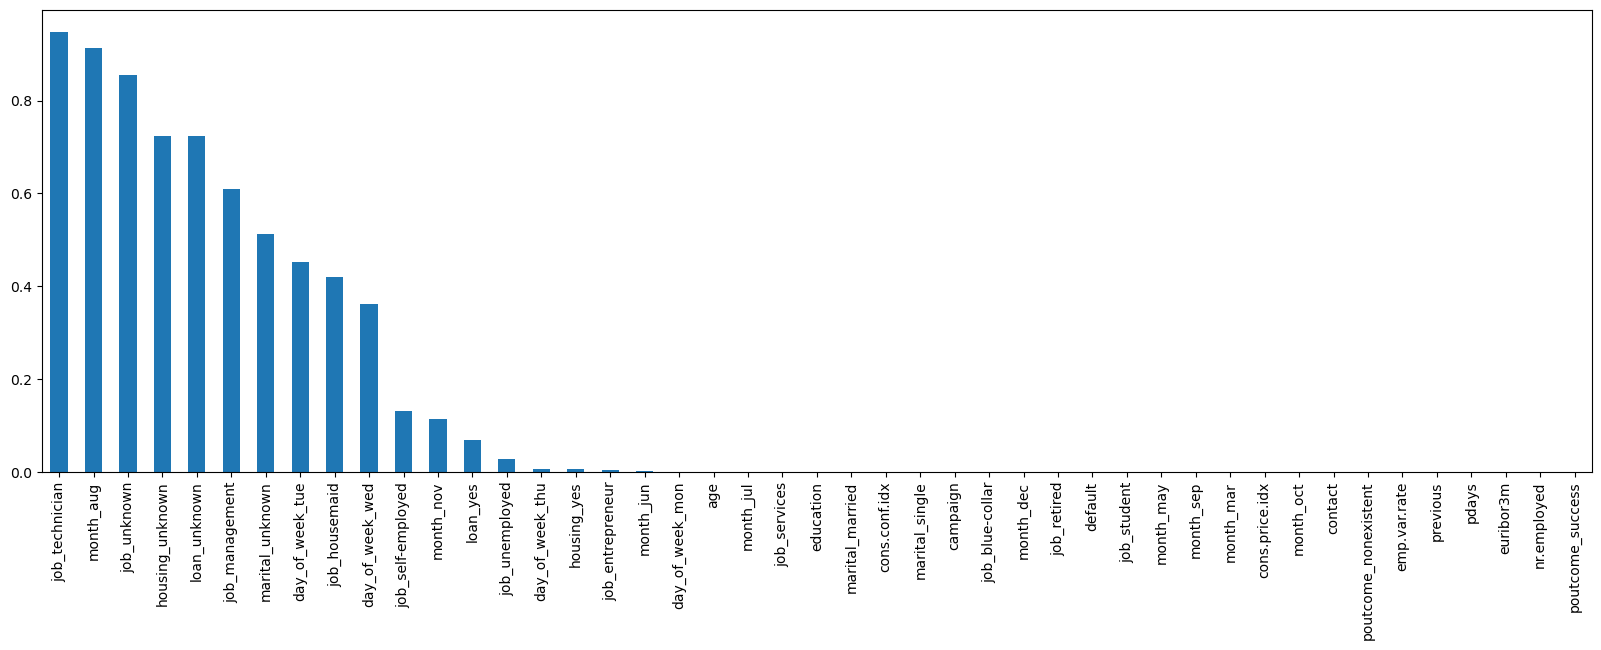

In [39]:
# 1) let's capture the pvalues in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their anova pvalues
# 4) and make a var plot

univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 6))

- The smaller the p_value the more predictive the feature is.
- Features on the left of the plot are very bad at predicting the target. The most predictive features are on the right of the plot.

### Mutual Information

In [40]:
# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# calculate the mutual information between the variables and the target

# the smaller the value of the mi, the less information we can infer from
# the feature about the target

mi = mutual_info_classif(X_train_scaled, y_train)

Text(0, 0.5, 'Mutual Information')

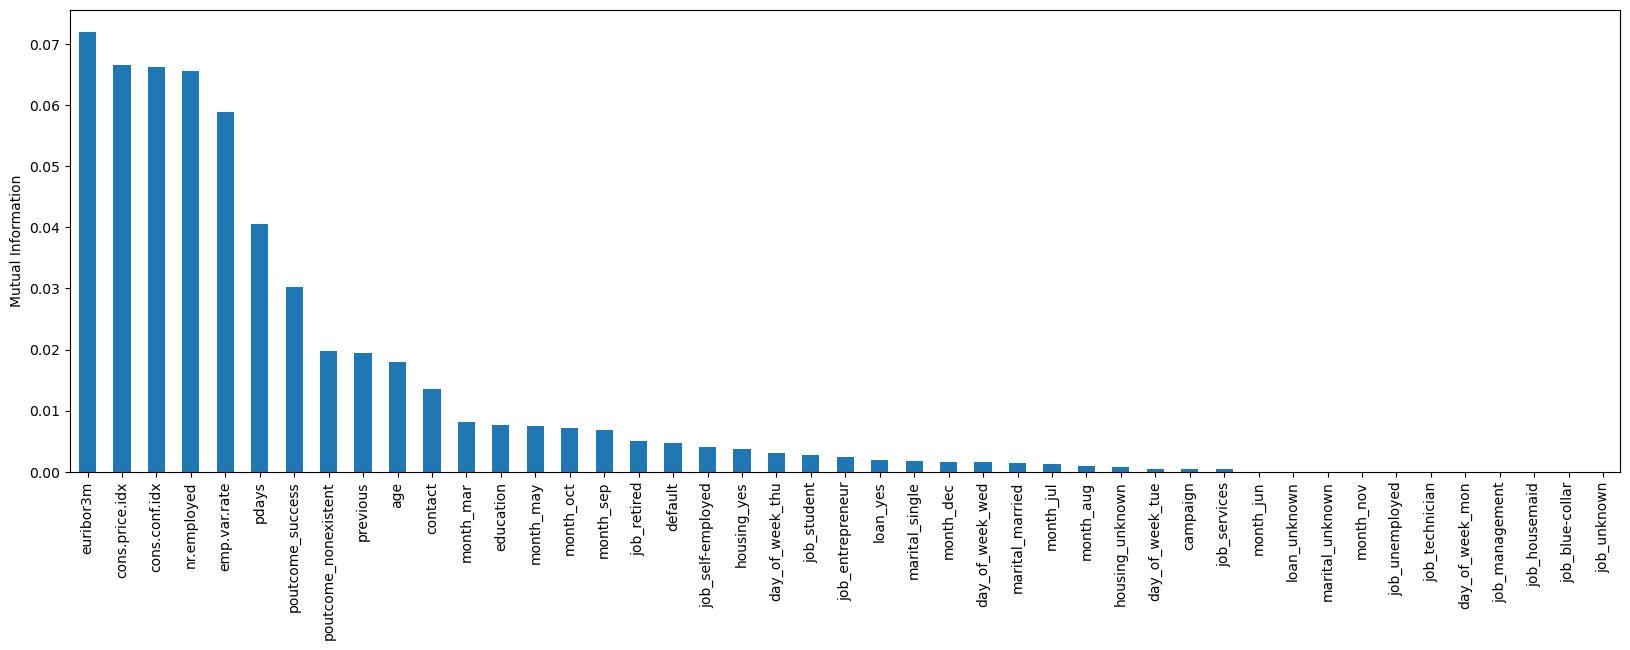

In [41]:
# 1) let's capture the above array in a pandas series
# 2)add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a var plot

mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

There are a few features (left of the plot) with higher mutual information values. There are also features with almost zero MI values on the right of the plot. The higher mutual information value the more predictive value is

### Quasi Constant

In [42]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(
    threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(X_train_scaled)  # fit finds the features with low variance

sum(sel.get_support()) # how many not quasi-constant?

40

In [43]:
features_to_keep = X_train_scaled.columns[sel.get_support()]

In [44]:
# # let's print the feature that will be removed by Quaasi Constant

quasi_constant = X_train_scaled.columns[~sel.get_support()]
quasi_constant

Index(['campaign', 'previous', 'job_unknown', 'marital_unknown', 'month_dec'], dtype='object')

### Summary

In [45]:
# Selected Features
col = ['poutcome_success', 'pdays', 'previous', 'age', 'contact', 'default', 'euribor3m', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'poutcome_nonexistent']

print('Num of feature used : ', len(col))

Num of feature used :  11


## Handling Imbalanced Target

In [47]:
# check how imblace the data is
data['y'].value_counts()/data.shape[0]*100

0    88.331134
1    11.668866
Name: y, dtype: float64

In [48]:
from imblearn.over_sampling import SMOTE

# Random Over Sampling
sm = SMOTE(random_state=0)
sm.fit(X_train_scaled, y_train)
X_smote, y_smote = sm.fit_resample(X_train_scaled, y_train)

In [49]:
print('X_smote shape : ', X_smote.shape)
print('X_train_scaled shape : ', X_train_scaled.shape)
print('X_test_scaled shape : ', X_test_scaled.shape)
print('y_smote shape : ', y_smote.shape)
print('y_train shape : ', y_train.shape)
print('y_test shape : ', y_test.shape)

X_smote shape :  (48706, 45)
X_train_scaled shape :  (27582, 45)
X_test_scaled shape :  (11822, 45)
y_smote shape :  (48706,)
y_train shape :  (27582,)
y_test shape :  (11822,)


# Modeling

In [17]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, classification_report
from sklearn.metrics import confusion_matrix, make_scorer

## Basic Modeling

In [19]:
classifiers = {
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(eval_metric = 'logloss'),
    AdaBoostClassifier()
}

model_eval = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F2-Score'])

In [20]:
for clf in classifiers:
    clf.fit(X_smote[col], y_smote)
    y_test_pred = clf.predict(X_test_scaled[col])
    
    model = str(type(clf)).split('.')[-1][:-2]
    
    # Accuracy
    accuracy = round(accuracy_score(y_test, y_test_pred),2)
    
    # Precision
    precision = round(precision_score(y_test, y_test_pred),2)
    
    # Recall
    recall = round(recall_score(y_test, y_test_pred),2)
    
    # F1-Score
    f2 = round(fbeta_score(y_test, y_test_pred, beta=2),2)
    
    model_eval = model_eval.append({'Model':model,
                                    'Accuracy':accuracy,
                                    'Precision':precision,
                                    'Recall':recall,
                                    'F2-Score':f2},
                                    ignore_index=True)

In [21]:
model_eval

,Model,Accuracy,Precision,Recall,F2-Score
0,XGBClassifier,0.89,0.51,0.36,0.38
1,AdaBoostClassifier,0.84,0.37,0.59,0.53
2,RandomForestClassifier,0.87,0.44,0.40,0.41
3,LogisticRegression,0.77,0.29,0.66,0.52
4,DecisionTreeClassifier,0.87,0.43,0.34,0.36
5,KNeighborsClassifier,0.87,0.43,0.47,0.47


In [22]:
# feature importance
def show_feature_importance(model, title):
    feat_importances = pd.Series(model.feature_importances_, index=X_smote[col].columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title(title, fontsize=20)

## Hyperparameter Tuning

### LogisticRegression

In [23]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

param = {
    'penalty' : ['none', 'l2', 'l1', 'elasticnet'],
    'C' : [float(x) for x in np.linspace(start=0, stop=1, num=40)]
     }


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
lr = LogisticRegression()

# search
lr_clf = RandomizedSearchCV(lr,
                            param,
                            scoring='recall',
                            cv=skf,
                            refit=True) # refits best model to entire dataset

search_lr = lr_clf.fit(X_smote[col],y_smote)

# best hyperparameters
search_lr.best_params_

{'penalty': 'none', 'C': 0.8717948717948718}

In [25]:
best_params = search_lr.best_params_
logreg = LogisticRegression(**best_params)
logreg.fit(X_smote[col], y_smote)

LogisticRegression(C=0.8717948717948718, penalty='none')

In [26]:
y_train_pred = logreg.predict(X_smote[col])
y_test_pred = logreg.predict(X_test_scaled[col])

print('TRAINING RESULT:')
print('======================================================')
print('Recall Score:', np.round(recall_score(y_smote, y_train_pred),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_smote, y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_smote, y_train_pred))

print('\n======================================================')

print('\nTESTING RESULT:')
print('======================================================')
print('Recall Score:', np.round(recall_score(y_test, y_test_pred),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred))

TRAINING RESULT:
Recall Score: 0.661
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.70      0.80      0.75     24353
           1       0.76      0.66      0.71     24353

    accuracy                           0.73     48706
   macro avg       0.73      0.73      0.73     48706
weighted avg       0.73      0.73      0.73     48706

Confussion Matrix ------------------------------------
[[19400  4953]
 [ 8250 16103]]


TESTING RESULT:
Recall Score: 0.659
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.95      0.79      0.86     10453
           1       0.29      0.66      0.40      1369

    accuracy                           0.77     11822
   macro avg       0.62      0.72      0.63     11822
weighted avg       0.87      0.77      0.81     11822

Confussion Matrix ------------------------------------
[[8213 2240]
 [ 467 

### Random Forest

max_depth: 1; train: 0.707959120470734; test: 0.7195032870708546
max_depth: 2; train: 0.707339733663673; test: 0.718772826880935
max_depth: 3; train: 0.6872096624341901; test: 0.701972242512783
max_depth: 4; train: 0.6841127283988852; test: 0.6946676406135865
max_depth: 5; train: 0.6165995664292351; test: 0.631117604090577
max_depth: 6; train: 0.609166924744503; test: 0.6172388604821037
max_depth: 7; train: 0.5930628677609167; test: 0.5924032140248356
max_depth: 8; train: 0.5899659337256117; test: 0.581446311176041
max_depth: 9; train: 0.5874883864973676; test: 0.5726807888970051
max_depth: 10; train: 0.5921337875503252; test: 0.5675675675675675
max_depth: 11; train: 0.5915144007432642; test: 0.5639152666179693
max_depth: 12; train: 0.5887271601114896; test: 0.5529583637691746
max_depth: 13; train: 0.5905853205326727; test: 0.5493060628195763
max_depth: 14; train: 0.5958501083926913; test: 0.5405405405405406
max_depth: 15; train: 0.6051409104986064; test: 0.5288531775018261
max_depth: 

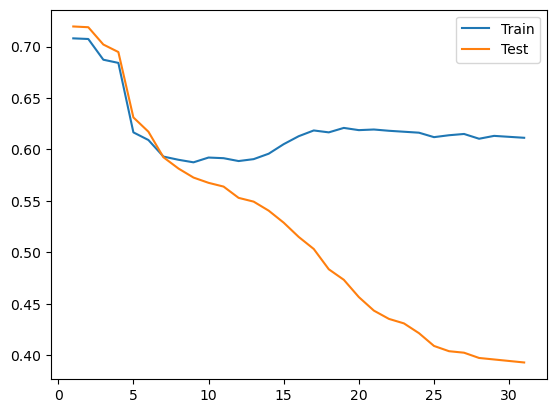

In [28]:
values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=x, random_state=123)
    model_rf_tunned.fit(X_smote[col],y_smote)
    
    # eval on train
    y_pred_train = model_rf_tunned.predict(X_train_scaled[col])
    train = recall_score(y_train, y_pred_train)
    train_score.append(train)
    
    # eval on test
    y_pred_test = model_rf_tunned.predict(X_test_scaled[col])
    test = recall_score(y_test, y_pred_test)
    test_score.append(test)
    
    print('max_depth: ' + str(x) + '; train: ' + str(train) + '; test: ' + str(test))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

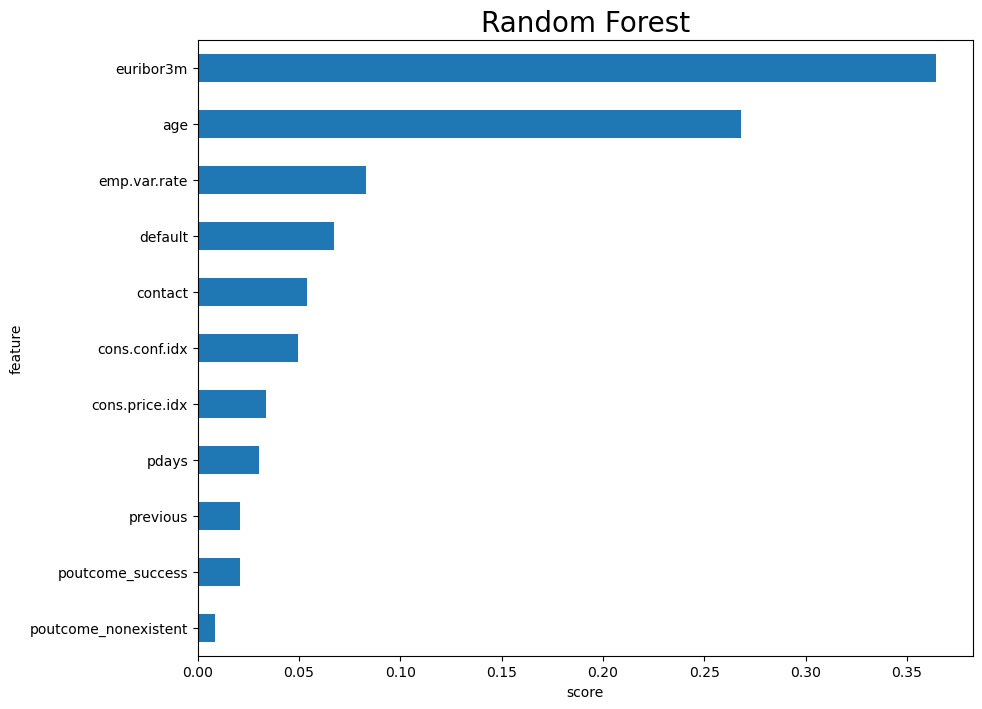

In [33]:
show_feature_importance(model_rf_tunned, 'Random Forest')

In [26]:
col

['poutcome_success',
 'pdays',
 'previous',
 'age',
 'contact',
 'default',
 'euribor3m',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'poutcome_nonexistent']

### KNeighborsClassifier

n_neighbors: 1; train: 0.6419944255187364; test: 0.3995617238860482
n_neighbors: 2; train: 0.42954475069681014; test: 0.2943754565376187
n_neighbors: 3; train: 0.5710746361102509; test: 0.4441197954711468
n_neighbors: 4; train: 0.484050789718179; test: 0.39006574141709277
n_neighbors: 5; train: 0.5562093527407866; test: 0.4747991234477721
n_neighbors: 6; train: 0.5122328894394549; test: 0.45215485756026297
n_neighbors: 7; train: 0.5620935274078662; test: 0.4996347699050402
n_neighbors: 8; train: 0.5379374419324868; test: 0.4784514243973703
n_neighbors: 9; train: 0.5778878909879219; test: 0.533235938641344
n_neighbors: 10; train: 0.5583772065655002; test: 0.5149744338933528
n_neighbors: 11; train: 0.580984825023227; test: 0.5434623813002192
n_neighbors: 12; train: 0.5630226076184577; test: 0.5281227173119065
n_neighbors: 13; train: 0.5874883864973676; test: 0.5624543462381301
n_neighbors: 14; train: 0.5741715701455559; test: 0.547845142439737
n_neighbors: 15; train: 0.5908950139362031; 

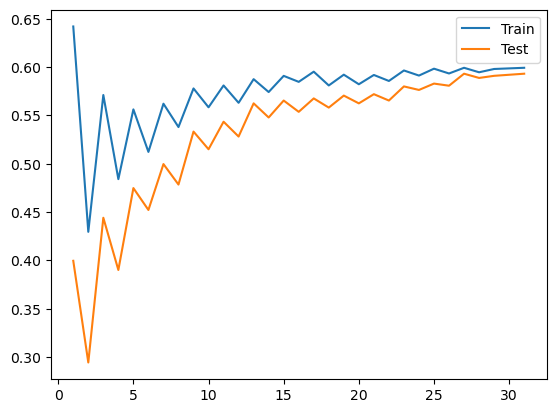

In [34]:
values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # n_neighbors
#values = [‘uniform’, ‘distance’, 'callable']
#values = ['auto’, ‘ball_tree’, ‘kd_tree’, ‘brute']
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # leaf_size for ball_tree and kd_tree

train_score = []
test_score = []

for x in values :
    model_kn_tunned = KNeighborsClassifier(n_neighbors=x)
    model_kn_tunned.fit(X_smote[col],y_smote)
    
    # eval on train
    y_pred_train = model_kn_tunned.predict(X_train_scaled[col])
    train = recall_score(y_train, y_pred_train)
    train_score.append(train)
    
    # eval on test
    y_pred_test = model_kn_tunned.predict(X_test_scaled[col])
    test = recall_score(y_test, y_pred_test)
    test_score.append(test)
    
    print('n_neighbors: ' + str(x) + '; train: ' + str(train) + '; test: ' + str(test))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

### AdaBoostClassifier

n_estimators: 1; train: 0.707339733663673; test: 0.718772826880935
n_estimators: 4; train: 0.580984825023227; test: 0.5909422936449964
n_estimators: 7; train: 0.6676989780117684; test: 0.674945215485756
n_estimators: 11; train: 0.5800557448126354; test: 0.5858290723155588
n_estimators: 14; train: 0.5794363580055745; test: 0.5836376917457998
n_estimators: 18; train: 0.5946113347785692; test: 0.5960555149744339
n_estimators: 21; train: 0.6035924434809539; test: 0.6055514974433893
n_estimators: 24; train: 0.5964694951997522; test: 0.5960555149744339
n_estimators: 28; train: 0.5961598017962217; test: 0.5967859751643535
n_estimators: 31; train: 0.5893465469185506; test: 0.5887509130752374
n_estimators: 35; train: 0.5964694951997522; test: 0.5938641344046749
n_estimators: 38; train: 0.5952307215856302; test: 0.5945945945945946
n_estimators: 41; train: 0.5961598017962217; test: 0.5938641344046749
n_estimators: 45; train: 0.5961598017962217; test: 0.5931336742147553
n_estimators: 48; train: 0.

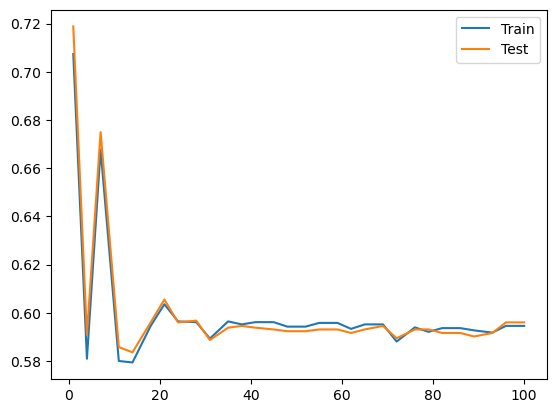

In [21]:
values = [int(x) for x in np.linspace(start=1, stop=100, num=30)] # n_estimators
#values = ['SAMME', 'SAMME.R'] # algorithm
#values = [float(x) for x in np.linspace(start=0, stop=1, num=35)] # learning_rate

train_score = []
test_score = []

for x in values :
    model_ab_tunned = AdaBoostClassifier(n_estimators=x)
    model_ab_tunned.fit(X_smote[col],y_smote)
    
    # eval on train
    y_pred_train = model_ab_tunned.predict(X_train_scaled[col])
    train = recall_score(y_train, y_pred_train)
    train_score.append(train)
    
    # eval on test
    y_pred_test = model_ab_tunned.predict(X_test_scaled[col])
    test = recall_score(y_test, y_pred_test)
    test_score.append(test)
    
    print('n_estimators: ' + str(x) + '; train: ' + str(train) + '; test: ' + str(test))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

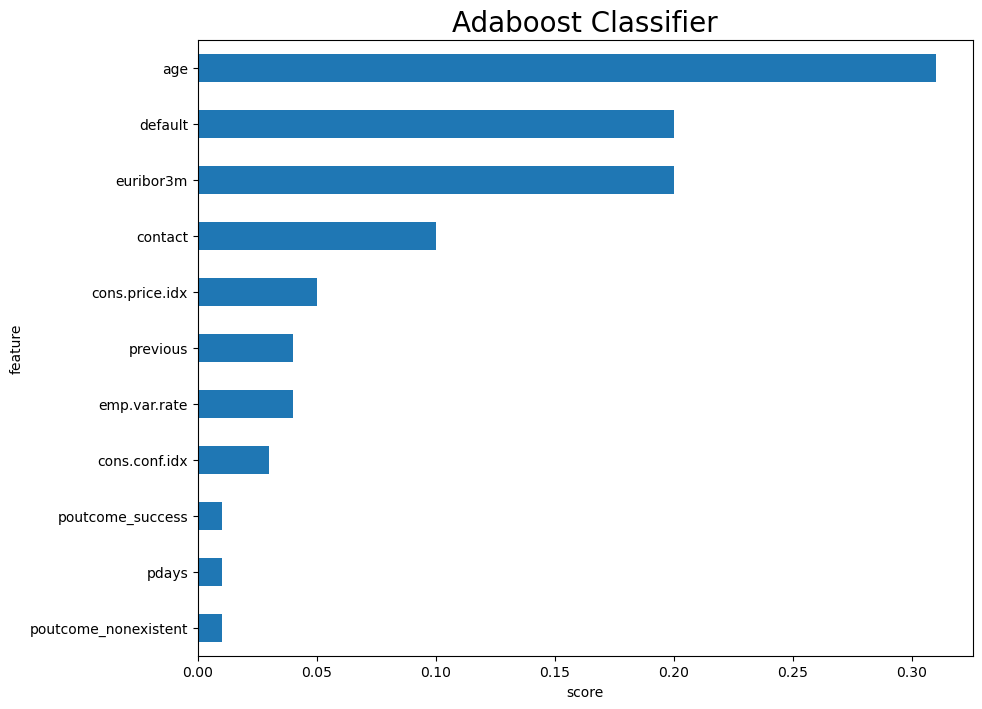

In [23]:
show_feature_importance(model_ab_tunned, 'Adaboost Classifier')

## Modeling

In [52]:
col3 = ['poutcome_success', 'pdays', 'previous', 'age', 'contact']

### Logistic Regression

In [56]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

param = {
    'penalty' : ['none', 'l2', 'l1', 'elasticnet'],
    'C' : [float(x) for x in np.linspace(start=0, stop=1, num=40)]
     }


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
lr = LogisticRegression()

# search
lr_clf = RandomizedSearchCV(lr,
                            param,
                            scoring='recall',
                            cv=skf,
                            refit=True) # refits best model to entire dataset

search_lr = lr_clf.fit(X_smote[col3],y_smote)

# best hyperparameters
search_lr.best_params_

{'penalty': 'l2', 'C': 0.41025641025641024}

In [57]:
best_params = search_lr.best_params_
logreg = LogisticRegression(**best_params)
logreg.fit(X_smote[col3], y_smote)

LogisticRegression(C=0.41025641025641024)

In [58]:
y_train_pred = logreg.predict(X_smote[col3])
y_test_pred = logreg.predict(X_test_scaled[col3])

print('TRAINING RESULT:')
print('======================================================')
print('Recall Score:', np.round(recall_score(y_smote, y_train_pred),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_smote, y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_smote, y_train_pred))

print('\n======================================================')

print('\nTESTING RESULT:')
print('======================================================')
print('Recall Score:', np.round(recall_score(y_test, y_test_pred),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred))

TRAINING RESULT:
Recall Score: 0.839
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.72      0.40      0.52     24353
           1       0.58      0.84      0.69     24353

    accuracy                           0.62     48706
   macro avg       0.65      0.62      0.60     48706
weighted avg       0.65      0.62      0.60     48706

Confussion Matrix ------------------------------------
[[ 9828 14525]
 [ 3910 20443]]


TESTING RESULT:
Recall Score: 0.833
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.95      0.39      0.55     10453
           1       0.15      0.83      0.26      1369

    accuracy                           0.44     11822
   macro avg       0.55      0.61      0.40     11822
weighted avg       0.85      0.44      0.52     11822

Confussion Matrix ------------------------------------
[[4074 6379]
 [ 228 

### Random Forest

max_depth: 1; train: 0.31898420563641994; test: 0.31994156318480643
max_depth: 2; train: 0.8488696190771137; test: 0.83345507669832
max_depth: 3; train: 0.8513471663053577; test: 0.8341855368882396
max_depth: 4; train: 0.5379374419324868; test: 0.5105916727538349
max_depth: 5; train: 0.5150201300712295; test: 0.48575602629656683
max_depth: 6; train: 0.4781666150510994; test: 0.44996347699050404
max_depth: 7; train: 0.4441003406627439; test: 0.4141709276844412
max_depth: 8; train: 0.41498916073087644; test: 0.37034331628926226
max_depth: 9; train: 0.3855682873954785; test: 0.34696859021183346
max_depth: 10; train: 0.3793744193248684; test: 0.34331628926223523
max_depth: 11; train: 0.353360173428306; test: 0.31848064280496713
max_depth: 12; train: 0.35057293279653146; test: 0.3162892622352082
max_depth: 13; train: 0.35181170641065346; test: 0.3140978816654492
max_depth: 14; train: 0.33106224837410964; test: 0.2943754565376187
max_depth: 15; train: 0.3279653143388046; test: 0.289992695398

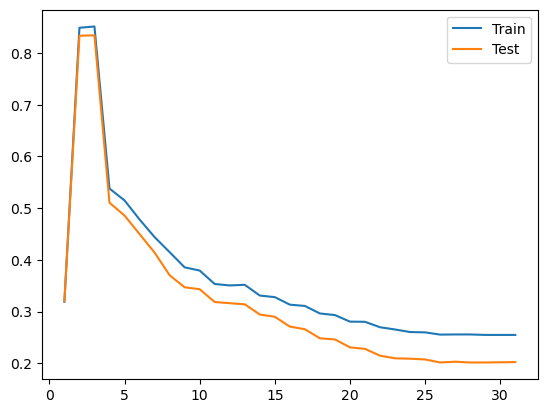

In [55]:
values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=x, random_state=123)
    model_rf_tunned.fit(X_smote[col3],y_smote)
    
    # eval on train
    y_pred_train = model_rf_tunned.predict(X_train_scaled[col3])
    train = recall_score(y_train, y_pred_train)
    train_score.append(train)
    
    # eval on test
    y_pred_test = model_rf_tunned.predict(X_test_scaled[col3])
    test = recall_score(y_test, y_pred_test)
    test_score.append(test)
    
    print('max_depth: ' + str(x) + '; train: ' + str(train) + '; test: ' + str(test))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

In [21]:
model_rf_tunned = RandomForestClassifier(max_depth=3, random_state=123)
model_rf_tunned.fit(X_smote[col3],y_smote)
    
# eval on train
y_pred_train = model_rf_tunned.predict(X_train_scaled[col3])
train_rf = recall_score(y_train, y_pred_train)
    
    
# eval on test
y_pred_test = model_rf_tunned.predict(X_test_scaled[col3])
test_rf = recall_score(y_test, y_pred_test)
    
print('Recall Train RF :', train_rf)
print('Recall Test RF :', test_rf)
    

Recall Train RF : 0.8513471663053577
Recall Test RF : 0.8341855368882396


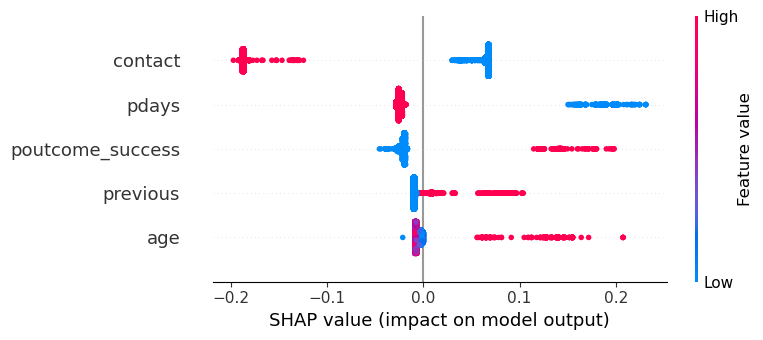

In [22]:
import shap
explainer = shap.TreeExplainer(model_rf_tunned)
shap_values = explainer.shap_values(X_test_scaled[col3])
shap.summary_plot(shap_values[1], X_test_scaled[col3])

### Adaboost Classifier

n_estimators: 1; train: 0.8343140291111799; test: 0.8159240321402483
n_estimators: 2; train: 0.8488696190771137; test: 0.83345507669832
n_estimators: 3; train: 0.8488696190771137; test: 0.83345507669832
n_estimators: 4; train: 0.8544441003406628; test: 0.8392987582176772
n_estimators: 5; train: 0.548467017652524; test: 0.5259313367421475
n_estimators: 6; train: 0.5558996593372562; test: 0.533235938641344
n_estimators: 7; train: 0.5419634561783834; test: 0.5200876552227903
n_estimators: 8; train: 0.5558996593372562; test: 0.533235938641344
n_estimators: 9; train: 0.5419634561783834; test: 0.5200876552227903
n_estimators: 10; train: 0.5558996593372562; test: 0.533235938641344
n_estimators: 11; train: 0.5122328894394549; test: 0.48721694667640614
n_estimators: 12; train: 0.5072777949829669; test: 0.4813732651570489
n_estimators: 13; train: 0.5122328894394549; test: 0.4864864864864865
n_estimators: 14; train: 0.5072777949829669; test: 0.4813732651570489
n_estimators: 15; train: 0.512232889

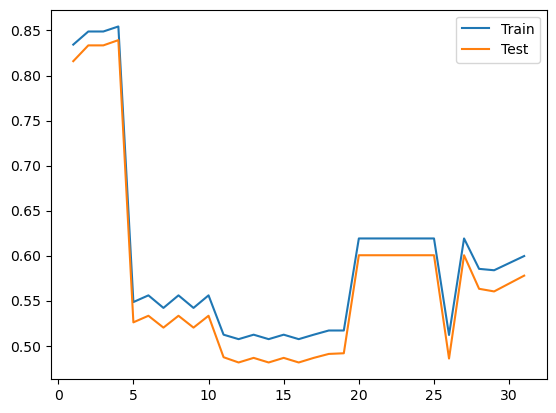

In [59]:
values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # n_estimators
#values = ['SAMME', 'SAMME.R'] # algorithm
#values = [float(x) for x in np.linspace(start=0, stop=1, num=35)] # learning_rate

train_score = []
test_score = []

for x in values :
    model_ab_tunned = AdaBoostClassifier(n_estimators=x)
    model_ab_tunned.fit(X_smote[col3],y_smote)
    
    # eval on train
    y_pred_train = model_ab_tunned.predict(X_train_scaled[col3])
    train = recall_score(y_train, y_pred_train)
    train_score.append(train)
    
    # eval on test
    y_pred_test = model_ab_tunned.predict(X_test_scaled[col3])
    test = recall_score(y_test, y_pred_test)
    test_score.append(test)
    
    print('n_estimators: ' + str(x) + '; train: ' + str(train) + '; test: ' + str(test))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

algorithm: SAMME; train: 0.8488696190771137; test: 0.83345507669832
algorithm: SAMME.R; train: 0.8544441003406628; test: 0.8392987582176772


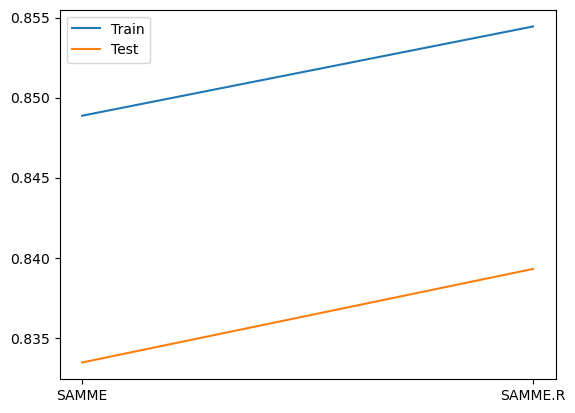

In [61]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # n_estimators
values = ['SAMME', 'SAMME.R'] # algorithm
#values = [float(x) for x in np.linspace(start=0, stop=1, num=35)] # learning_rate

train_score = []
test_score = []

for x in values :
    model_ab_tunned = AdaBoostClassifier(n_estimators=4,
                                         random_state=123,
                                         algorithm=x)
    model_ab_tunned.fit(X_smote[col3],y_smote)
    
    # eval on train
    y_pred_train = model_ab_tunned.predict(X_train_scaled[col3])
    train = recall_score(y_train, y_pred_train)
    train_score.append(train)
    
    # eval on test
    y_pred_test = model_ab_tunned.predict(X_test_scaled[col3])
    test = recall_score(y_test, y_pred_test)
    test_score.append(test)
    
    print('algorithm: ' + str(x) + '; train: ' + str(train) + '; test: ' + str(test))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

learning_rate: 0.0001; train: 0.8343140291111799; test: 0.8159240321402483
learning_rate: 0.029508823529411764; train: 0.8488696190771137; test: 0.83345507669832
learning_rate: 0.05891764705882353; train: 0.8488696190771137; test: 0.83345507669832
learning_rate: 0.0883264705882353; train: 0.8488696190771137; test: 0.83345507669832
learning_rate: 0.11773529411764706; train: 0.8488696190771137; test: 0.83345507669832
learning_rate: 0.14714411764705881; train: 0.8488696190771137; test: 0.83345507669832
learning_rate: 0.17655294117647058; train: 0.8488696190771137; test: 0.83345507669832
learning_rate: 0.20596176470588234; train: 0.8488696190771137; test: 0.83345507669832
learning_rate: 0.2353705882352941; train: 0.8488696190771137; test: 0.83345507669832
learning_rate: 0.2647794117647059; train: 0.8488696190771137; test: 0.83345507669832
learning_rate: 0.29418823529411764; train: 0.8488696190771137; test: 0.83345507669832
learning_rate: 0.3235970588235294; train: 0.8488696190771137; test:

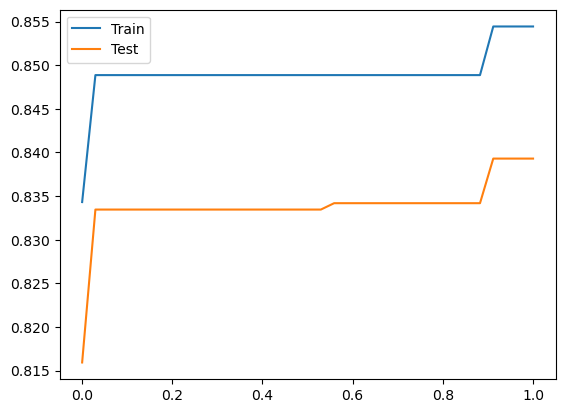

In [64]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # n_estimators
#values = ['SAMME', 'SAMME.R'] # algorithm
values = [float(x) for x in np.linspace(start=0.0001, stop=1, num=35)] # learning_rate

train_score = []
test_score = []

for x in values :
    model_ab_tunned = AdaBoostClassifier(n_estimators=4,
                                         random_state=123,
                                         algorithm='SAMME.R',
                                         learning_rate=x)
    model_ab_tunned.fit(X_smote[col3],y_smote)
    
    # eval on train
    y_pred_train = model_ab_tunned.predict(X_train_scaled[col3])
    train = recall_score(y_train, y_pred_train)
    train_score.append(train)
    
    # eval on test
    y_pred_test = model_ab_tunned.predict(X_test_scaled[col3])
    test = recall_score(y_test, y_pred_test)
    test_score.append(test)
    
    print('learning_rate: ' + str(x) + '; train: ' + str(train) + '; test: ' + str(test))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

In [19]:
model_ab_tunned = AdaBoostClassifier(n_estimators=4,
                                         random_state=123,
                                         algorithm='SAMME.R',
                                         learning_rate=1)
model_ab_tunned.fit(X_smote[col3],y_smote)
    
# eval on train
y_pred_train = model_ab_tunned.predict(X_train_scaled[col3])
train = recall_score(y_train, y_pred_train)

    
# eval on test
y_pred_test = model_ab_tunned.predict(X_test_scaled[col3])
test = recall_score(y_test, y_pred_test)

print('Recall Train Score', train)
print('Recall Test Score', test)

Recall Train Score 0.8544441003406628
Recall Test Score 0.8392987582176772


In [75]:
# feature importance
def show_feature_importance(model, title):
    feat_importances = pd.Series(model.feature_importances_, index=X_smote[col3].columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(4, 4))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title(title, fontsize=20)

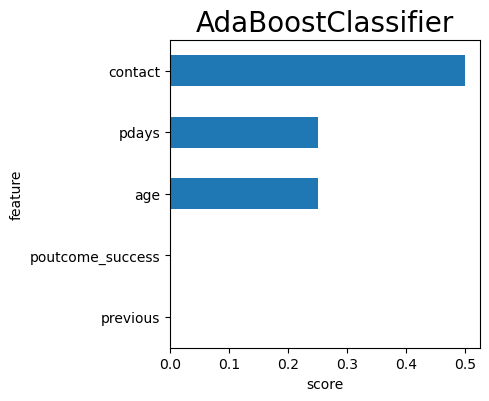

In [76]:
show_feature_importance(model_ab_tunned, 'AdaBoostClassifier')

<AxesSubplot:>

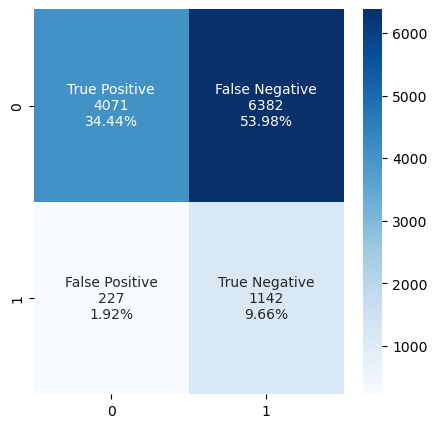

In [23]:
cf_matrix = confusion_matrix(y_test, y_pred_test)

group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(5, 5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# Simulation

In [24]:
# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
simulation_features = col3

In [37]:
# Create Simulation Function

def simulation(feature):
    # Define TP FN FP TN var
    tp, fn, fp, tn = cf_matrix.flatten()

    # Create Simulation Data
    df_response = data[data.y == 1][simulation_features]
    df_not_response = data[data.y == 0][simulation_features]
  
    cr_list = []
  
    # Create Improvement Experiments
    experiments = np.arange(-1,1.05,0.05)
    experiments[20] = 0
    
    for i in experiments:
        df_simulation = pd.concat([df_response.sample(int(np.ceil(0.1*df_response.shape[0])), random_state=123), df_not_response.sample(int(np.ceil(0.1*df_not_response.shape[0])), random_state=123)]).reset_index(drop=True)
        df_simulation[feature] = df_simulation[feature]*(1+i)
    
        # Feature Scaling
        temp = X_test[simulation_features].reset_index(drop=True)[:224].copy()
        temp[simulation_features] = df_simulation
        scaler = MinMaxScaler()
        scaler.fit(X_train[col3])
        df_simulation = scaler.transform(temp)
        df_simulation = pd.DataFrame(df_simulation, columns=col3)
        df_simulation = df_simulation[simulation_features]
    
        # Predict Simulation Values
        simulation_pred = model_rf_tunned.predict(df_simulation)

        # Adjust Predicted Value to Actual Value
        simulation_pred_pos = simulation_pred[simulation_pred==0]
        simulation_pred_pos[:(int(np.ceil((fp/(fp+tp))*(simulation_pred[simulation_pred==0].size))))] = 1
        simulation_pred_pos
        simulation_pred_neg = simulation_pred[simulation_pred==1]
        simulation_pred_neg[:(int(np.ceil((fn/(fn+tn))*(simulation_pred[simulation_pred==1].size))))] = 0
        simulation_pred_neg
        simulation_pred = np.concatenate((simulation_pred_neg, simulation_pred_pos))
    
        # Calculate Simulation Conversion Rate
        cr = simulation_pred[simulation_pred==1].size/simulation_pred.size
        cr_list.append(cr)
    
    # Create CR Plot
    # print(cr_list)
    plt.plot(experiments, cr_list, marker='o', linewidth=1)
    plt.ylabel('Conversion Rate')
    plt.xlabel(str(feature) + ' Increased')
    plt.title('Conversion Rate Increased by ' + str(feature))
    plt.axvline(linewidth=1, color='r', label = 'Current Condition')
    plt.legend()
    plt.show()

## Contact

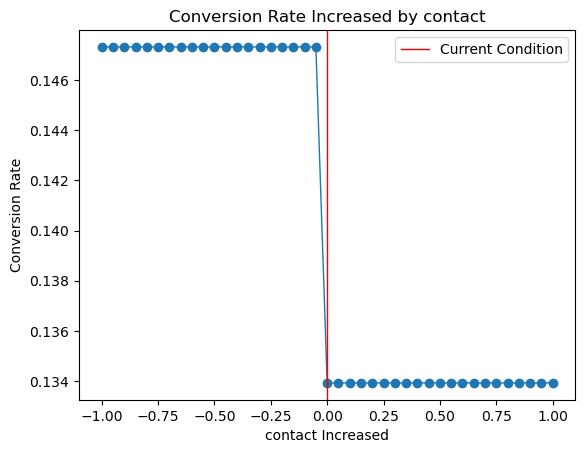

In [38]:
simulation('contact')

## Pdays

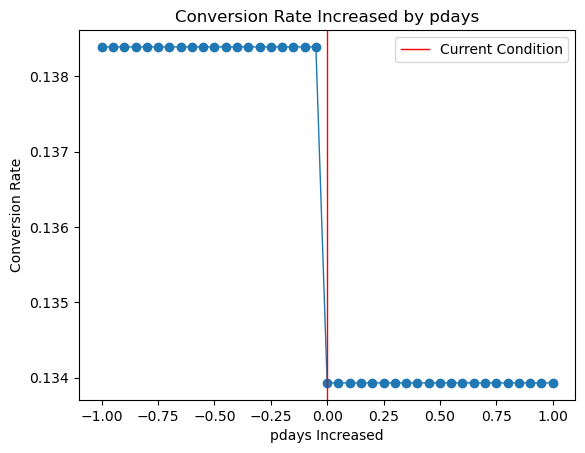

In [39]:
simulation('pdays')

## P Outcomes Succes

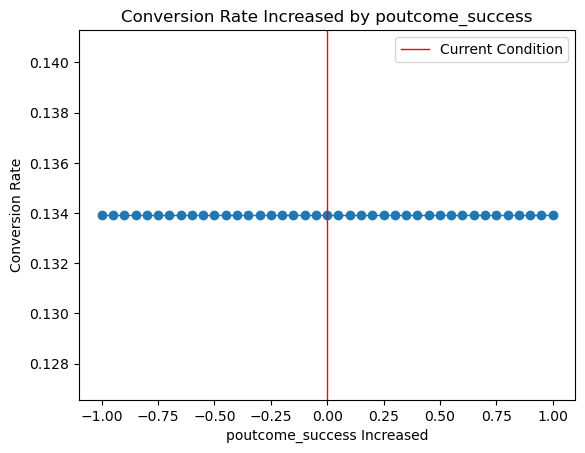

In [30]:
simulation('poutcome_success')

## Previous

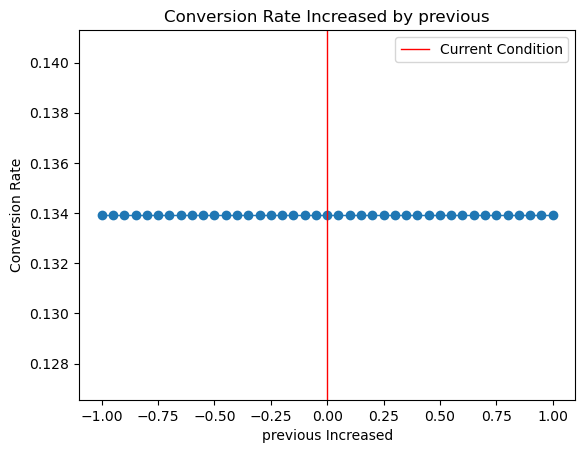

In [61]:
simulation('previous')

## Age

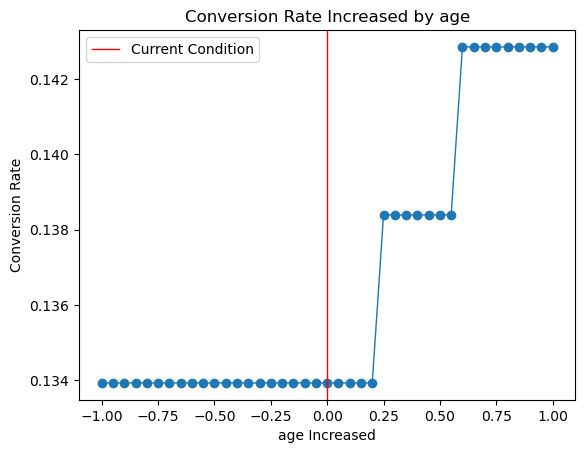

In [32]:
simulation('age')

## Simulation

In [56]:
print('Using Group of Ages around :')
print(round(data['age'].mean()))

Using Group of Ages around :
40


In [64]:
tp, fn, fp, tn = cf_matrix.flatten()

# Create Simulation Data
df_response = data[data.y == 1][simulation_features]
df_not_response = data[data.y == 0][simulation_features]

# Create Improvement Experiments
experiments = np.arange(-1,1.05,0.05)
experiments[20] = 0
    
df_simulation = pd.concat([df_response.sample(int(np.ceil(0.1*df_response.shape[0])), random_state=123), df_not_response.sample(int(np.ceil(0.1*df_not_response.shape[0])), random_state=123)]).reset_index(drop=True)
df_simulation['contact'] = 0
df_simulation['pdays'] = df_simulation['pdays']*0.95
df_simulation['age'] = df_simulation['age']*20


# Feature Scaling
temp = X_test[simulation_features].reset_index(drop=True)[:224].copy()
temp[simulation_features] = df_simulation
scaler = MinMaxScaler()
scaler.fit(X_train[col3])
df_simulation = scaler.transform(temp)
df_simulation = pd.DataFrame(df_simulation, columns=col3)
df_simulation = df_simulation[simulation_features]
    
# Predict Simulation Values
simulation_pred = model_rf_tunned.predict(df_simulation)

# Adjust Predicted Value to Actual Value
simulation_pred_pos = simulation_pred[simulation_pred==0]
simulation_pred_pos[:(int(np.ceil((fp/(fp+tp))*(simulation_pred[simulation_pred==0].size))))] = 1
simulation_pred_pos
simulation_pred_neg = simulation_pred[simulation_pred==1]
simulation_pred_neg[:(int(np.ceil((fn/(fn+tn))*(simulation_pred[simulation_pred==1].size))))] = 0
simulation_pred_neg
simulation_pred = np.concatenate((simulation_pred_neg, simulation_pred_pos))
    
# Calculate Simulation Conversion Rate
new_cr = simulation_pred[simulation_pred==1].size/simulation_pred.size

# Current Condition
current_cr = data.y.value_counts()[1]/data.y.shape[0]

print(f'Current Conversion Rate = {current_cr *100:.2f}%')
print(f'Simulation Conversion Rate After Recommendation = {new_cr *100:.2f}%')
print('Customer Conversion Rate Increment = ', round((new_cr *100)-(current_cr *100),2))

Current Conversion Rate = 11.67%
Simulation Conversion Rate After Recommendation = 14.73%
Customer Conversion Rate Increment =  3.06
